In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import hamming_loss
import seaborn as sns

In [2]:
def scaleMatrix(matrix):
    return matrix.div(matrix.sum(axis=1),axis=0)

In [3]:
def norm(series):
    b = max(series)
    a = min(series)
    return [(x - a) / (b - a) for x in series]

In [4]:
def npmc(init_state, matrix, original_states, init_state_col):
    matrix = scaleMatrix(matrix)
    probs = {k:list(matrix.iloc[original_states.index(k)]) for k in original_states}
    NewState = []
    for x in range(len(init_state)):
        NewState.append(np.random.choice(a = matrix.columns, p = probs[init_state[init_state_col][x]],size=1)[0])
    NextStep = pd.DataFrame()
    NextStep["Original State"] = init_state[init_state_col]
    NextStep["New State"] = NewState
    return NextStep

In [5]:
def chain(init_state, matrix, original_states, init_state_col,n):
    init_state = init_state.copy()
    out = pd.DataFrame()
    out[0] = init_state[init_state_col]
    for i in range(1,n+1):
        out[i] = npmc(out,matrix,original_states,i-1)["New State"]
    return out

In [6]:
tick = pd.read_csv("NASDAQ_Ticks.csv")
all_data = {}
all_tm = {}
returns = {}
for x in tick["Ticker"]:
    
    df = pd.DataFrame()
    t0 = pd.read_csv(x+".csv")["Adj Close"]
    returns[x] = t0.pct_change().iloc[::3][1:]
    df["MMYYYY"] = [x[5:7] + x[:4] for x in pd.read_csv(x+".csv")["Date"][1:]]
    df.reset_index(drop = True,inplace = True)
    df["t0"] = np.where(t0.pct_change()[1:] > 0, 1, 0)#np.sign(t0.pct_change()[1:]) + 1
    df.dropna(inplace=True)
    df.reset_index(drop = True,inplace = True)
    
    df["t1"] = df["t0"].shift(-3)
    df.dropna(inplace=True)
    df.reset_index(drop = True,inplace = True)
    
    states = ["Up","Down"]
    TM = pd.DataFrame(index = ["Up","Down"])
    
    tm = {"UU":0,"UD":0,"DU":0,"DD":0}
    
    for i in range(2,len(df)):
        
        if df["t0"][i] == 1 and df["t0"][i-1] == 1:
            tm["UU"] += 1
        elif df["t0"][i] == 0 and df["t0"][i-1] == 1:
            tm["UD"] += 1
        elif df["t0"][i] == 1 and df["t0"][i-1] == 0:
            tm["DU"] += 1
        else:
            tm["DD"] += 1
            
    TM["Up"] = [tm["UU"],tm["UD"]]
    TM["Down"] = [tm["DU"],tm["DD"]]
    
    findf = pd.read_csv(x + "_quarterly_valuation_measures.csv",header=None).T
    findf.columns = findf.iloc[0]
    findf.drop([0,1],inplace=True)
    
    findf1 = pd.DataFrame()
    findf1["MMYYYY"] = [y[:2]+ y[6:10] for y in findf["name"].str.replace('/', '-')]
    try:
        findf1["PeRatio"] = np.log(findf["PeRatio"].str.replace(',', '').astype(float))
    except:
        findf1["PeRatio"] = np.log(findf["PegRatio"].str.replace(',', '').astype(float)*0.18)
    findf1['MarketCap'] = np.log(findf['MarketCap'].str.replace(',', '').astype(float))
    findf1.interpolate(method='linear',inplace=True)
    
    findf1.dropna(inplace=True)
    findf1.reset_index(drop = True,inplace = True)
    
    alldf = df.merge(right=findf1, on = ["MMYYYY"])
    
    if len(alldf) >= 40:
        all_tm[x] = scaleMatrix(TM)
        all_data[x] = alldf

In [7]:
l = 0
for x in all_data.keys():
    l+= len(all_data[x])
l

8912

/Users/austinriis-due/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


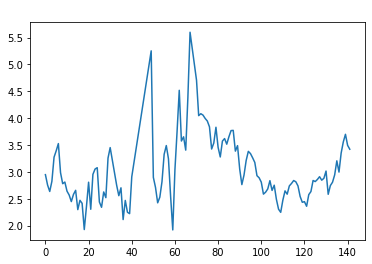

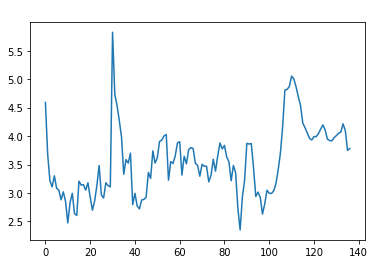

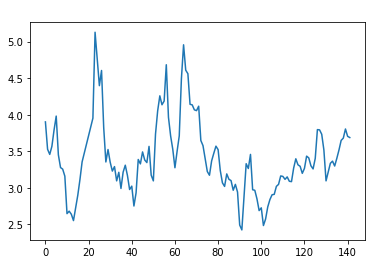

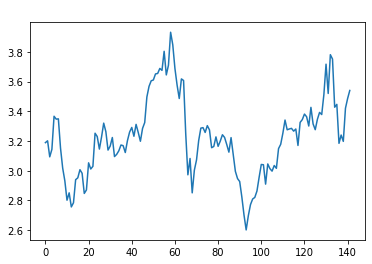

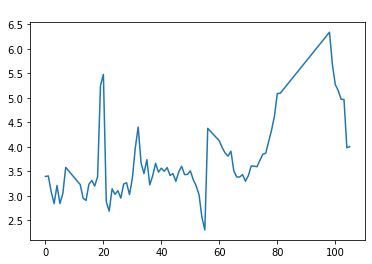

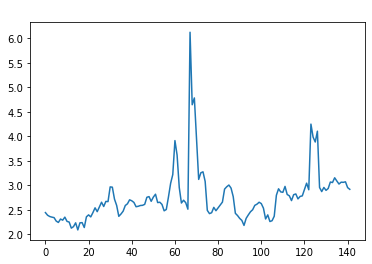

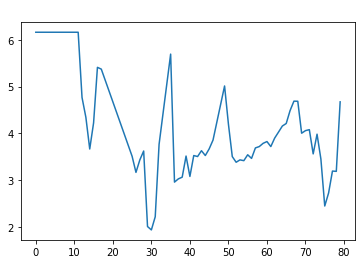

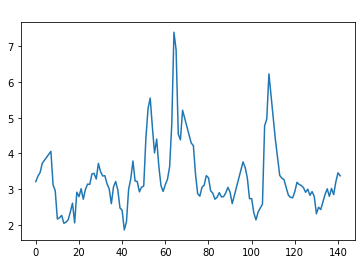

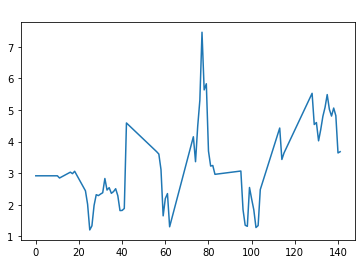

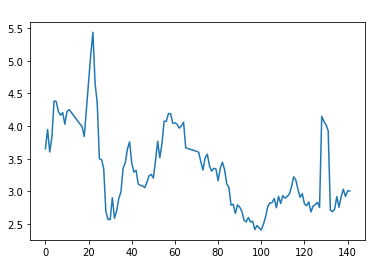

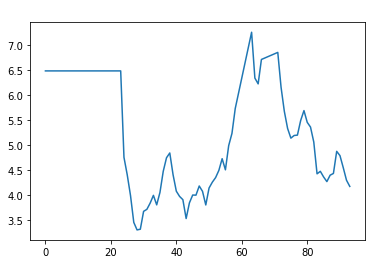

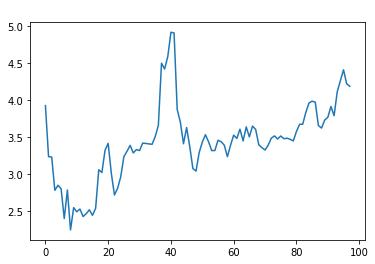

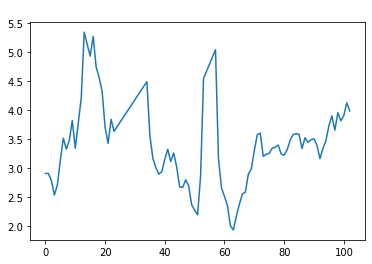

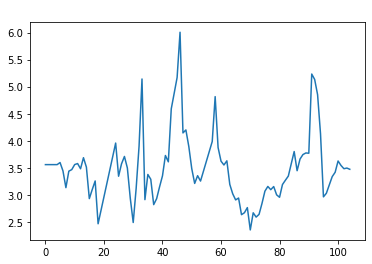

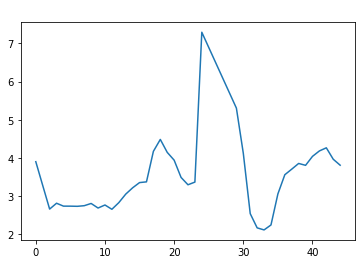

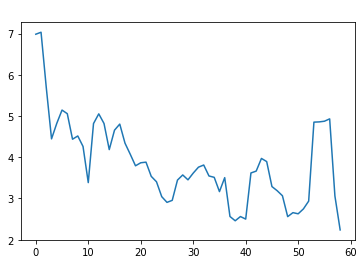

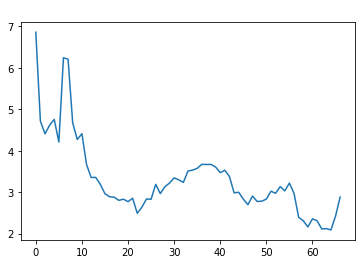

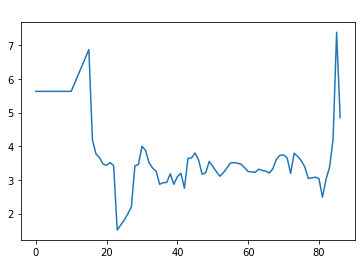

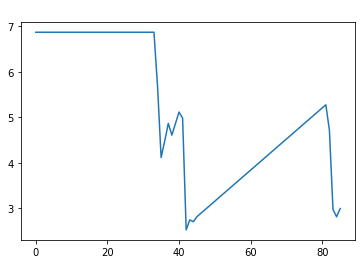

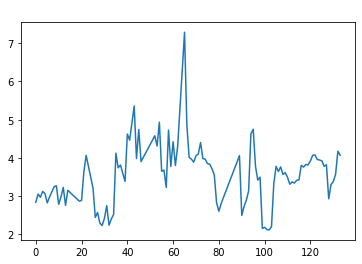

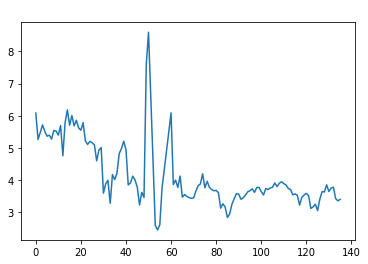

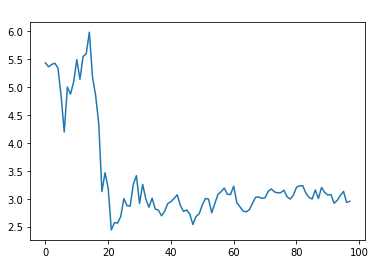

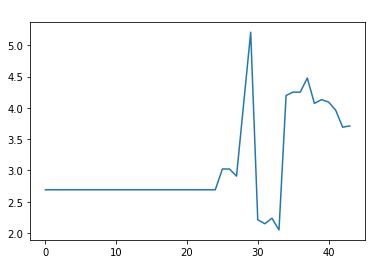

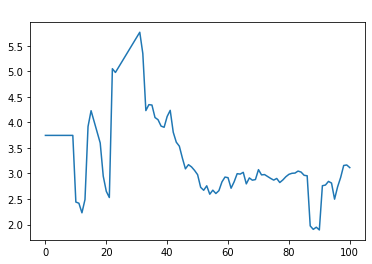

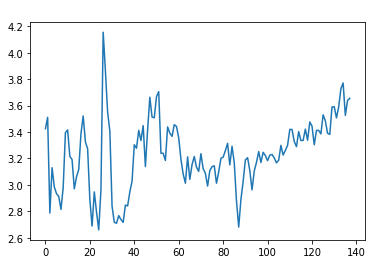

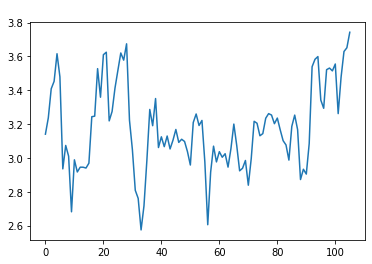

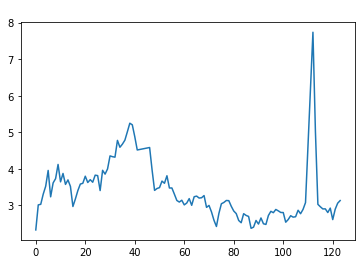

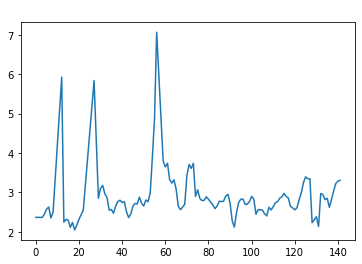

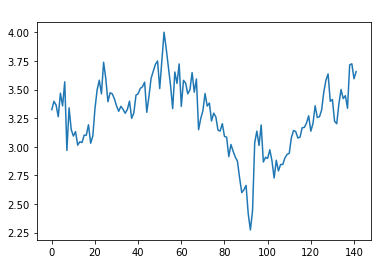

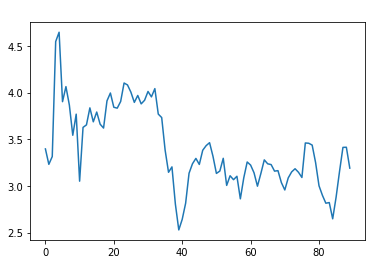

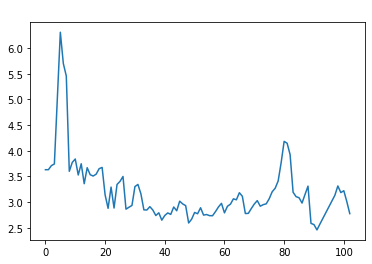

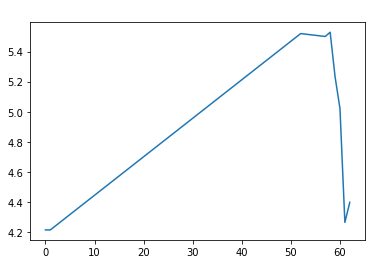

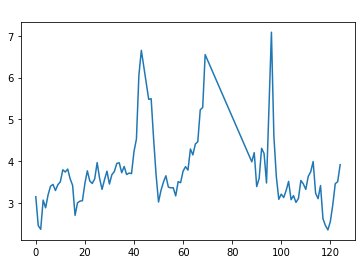

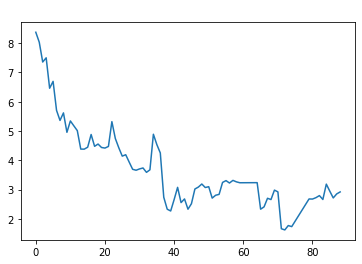

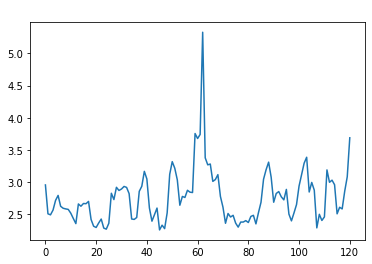

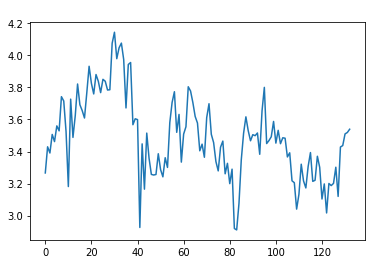

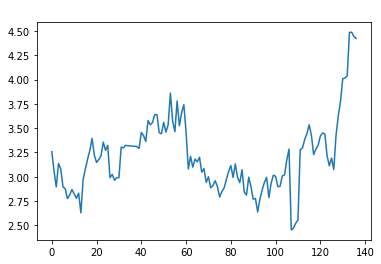

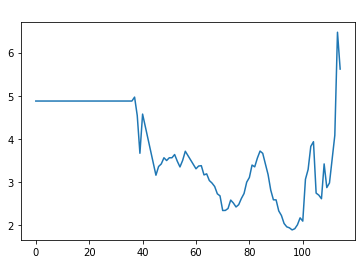

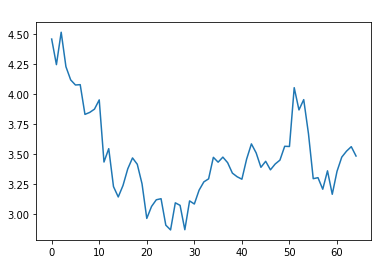

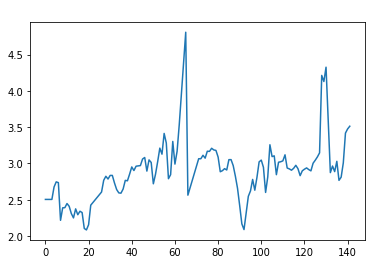

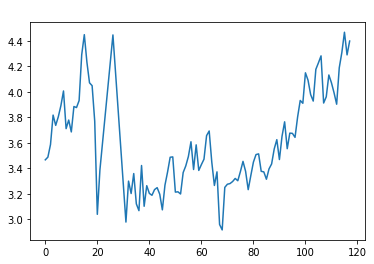

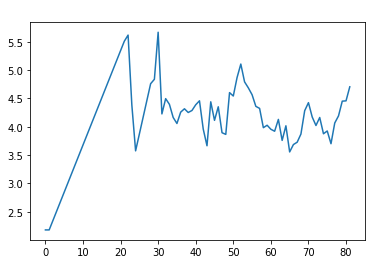

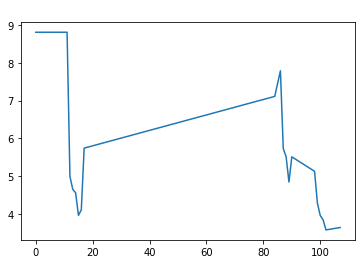

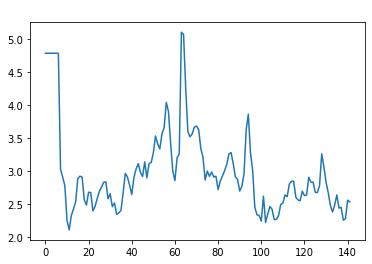

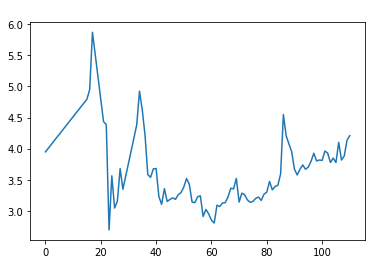

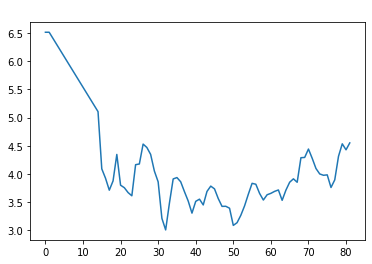

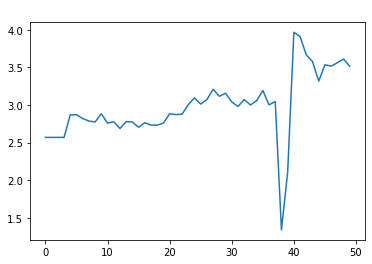

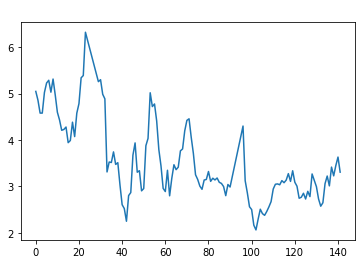

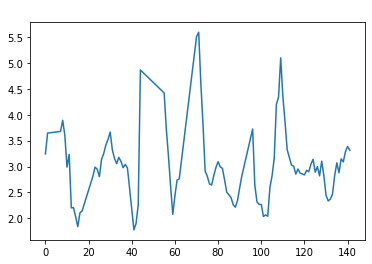

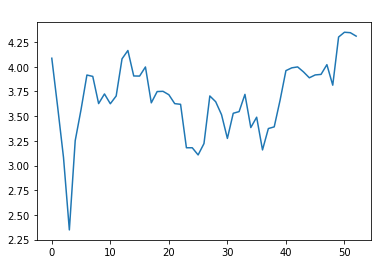

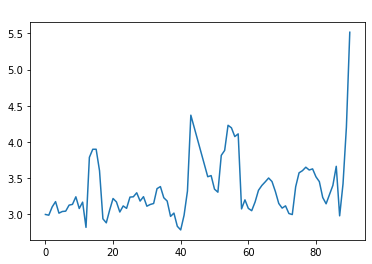

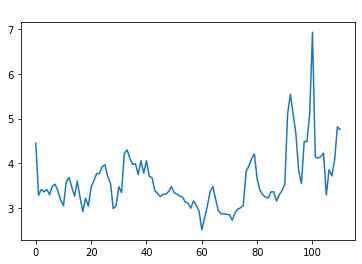

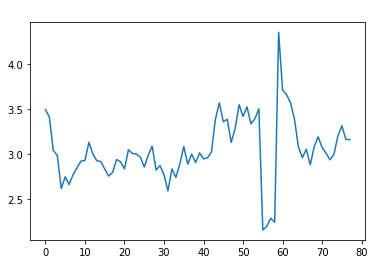

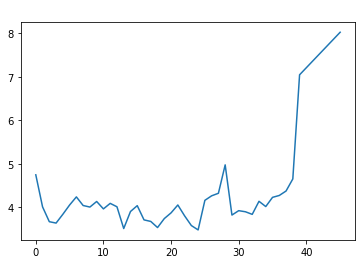

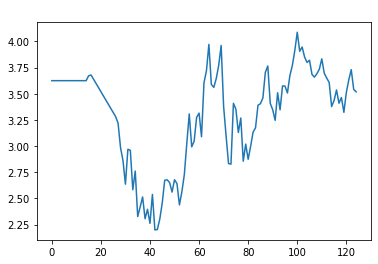

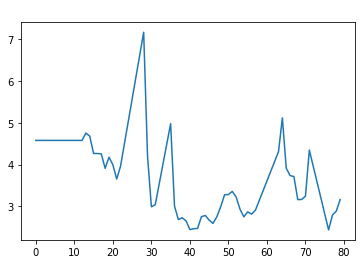

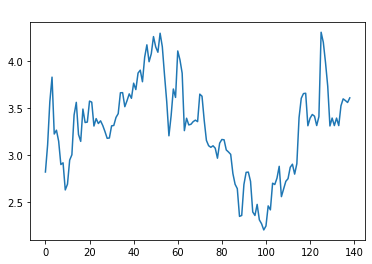

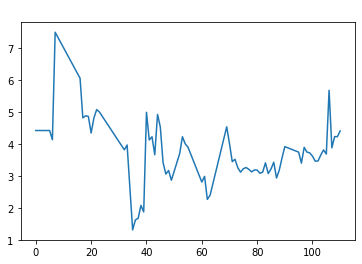

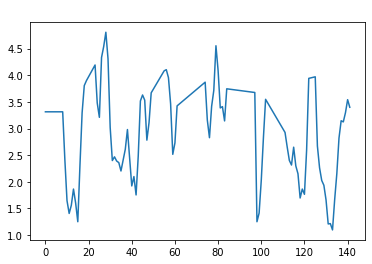

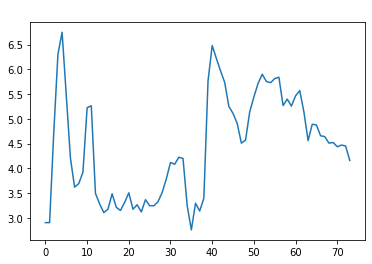

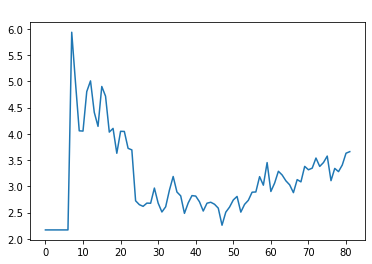

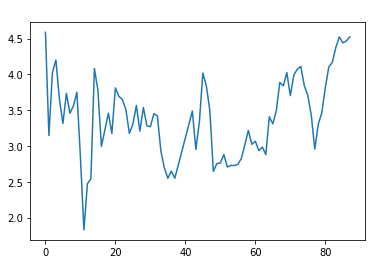

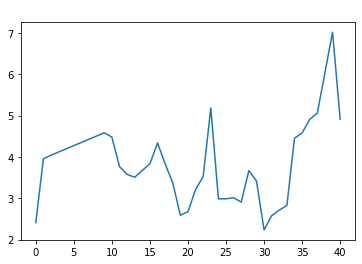

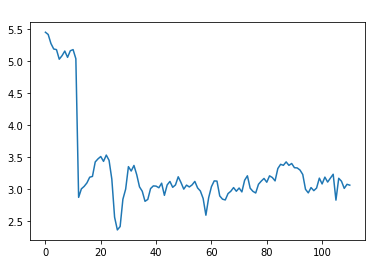

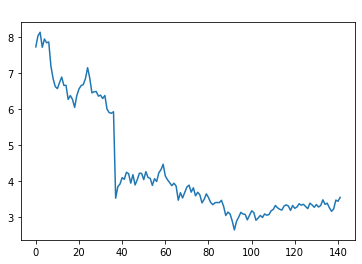

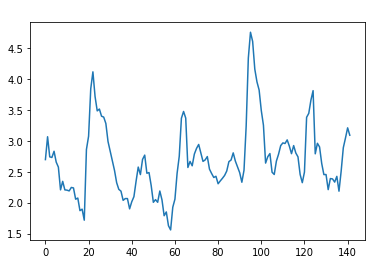

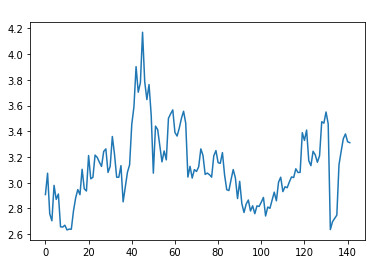

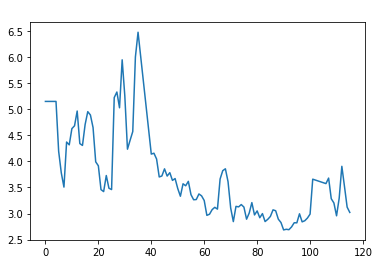

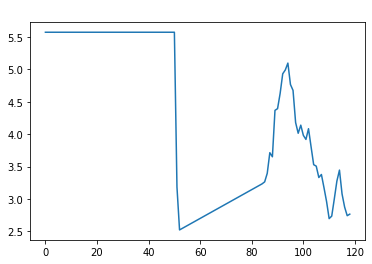

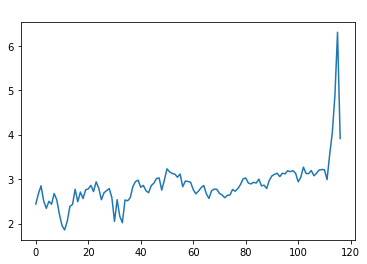

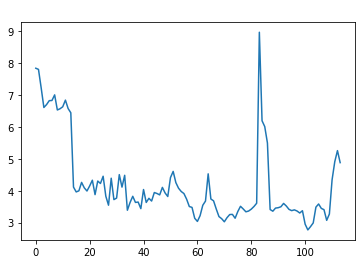

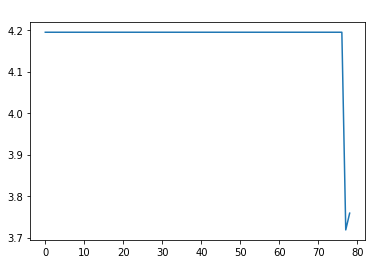

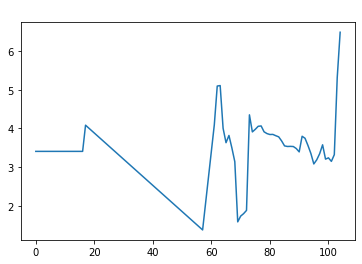

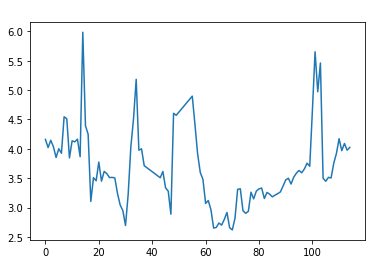

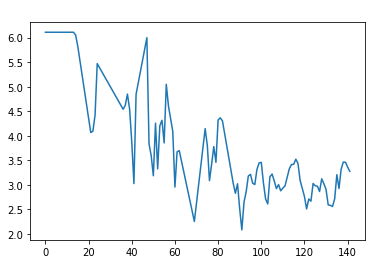

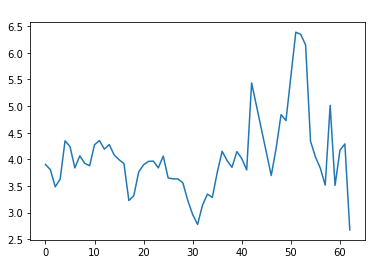

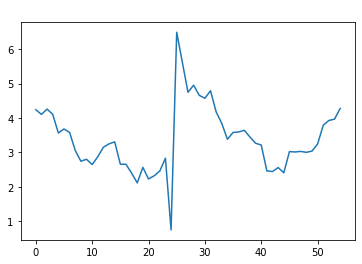

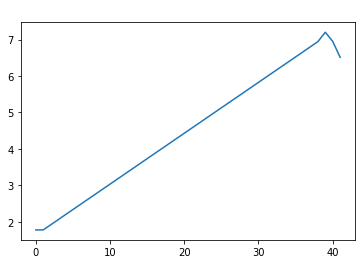

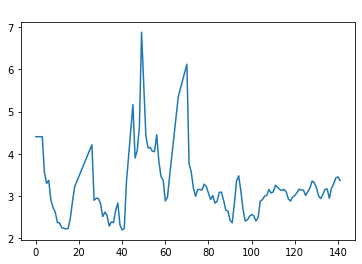

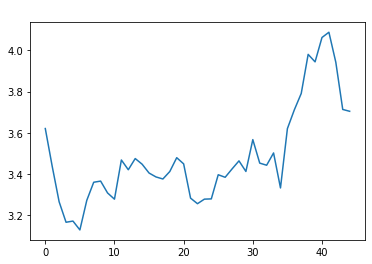

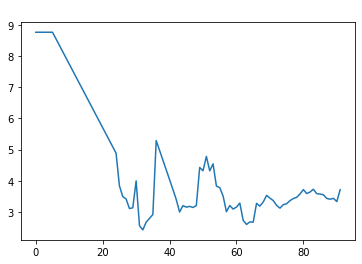

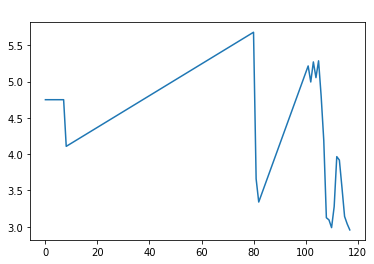

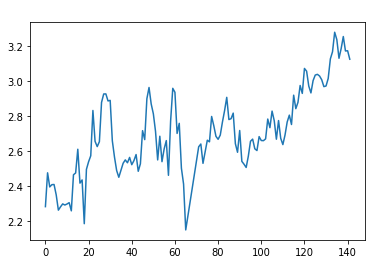

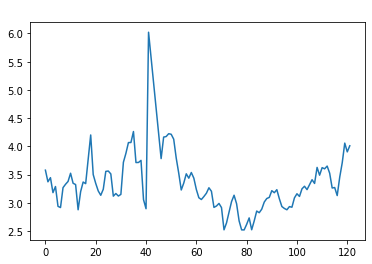

In [8]:
for i in range(len(all_data)):
    k = list(all_data.keys())
    plt.figure(i)
    plt.plot([x for x in range(len(all_data[k[i]]))], all_data[k[i]]["PeRatio"])
    plt.title(k[i],c="white",loc="left")

/Users/austinriis-due/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


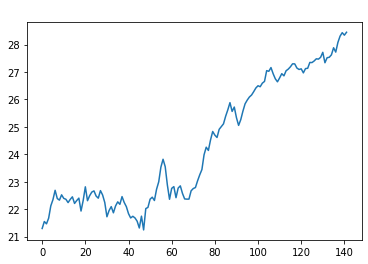

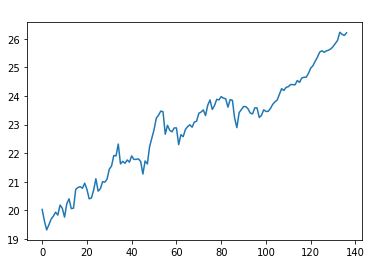

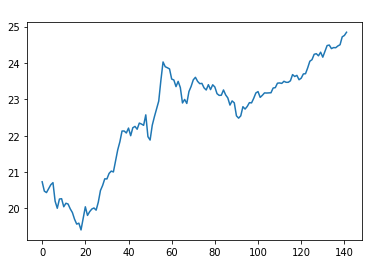

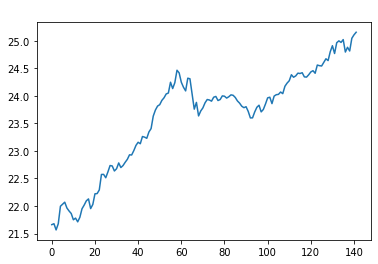

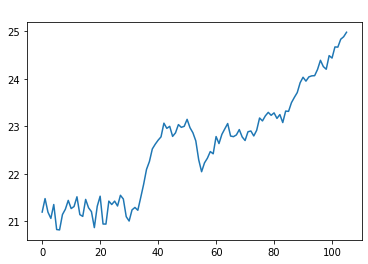

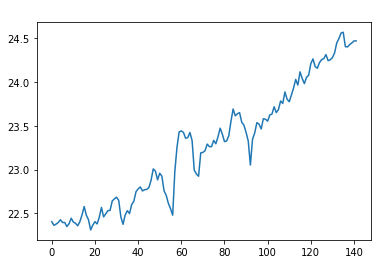

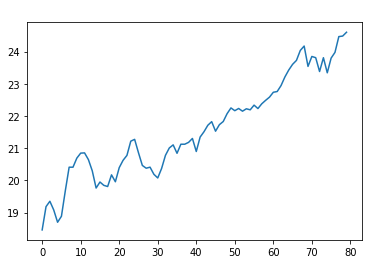

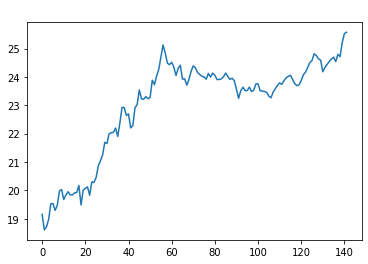

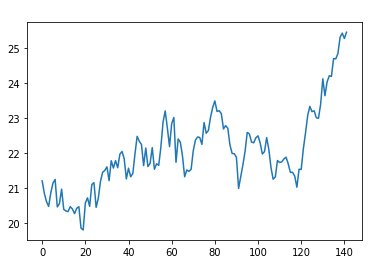

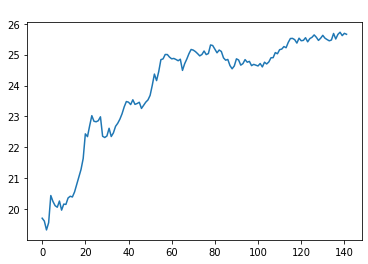

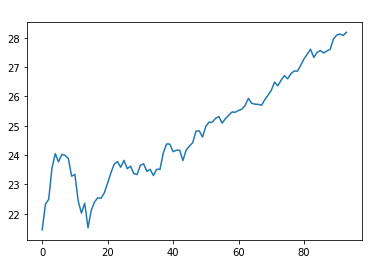

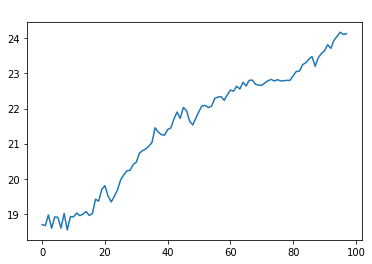

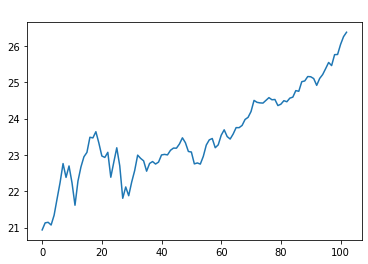

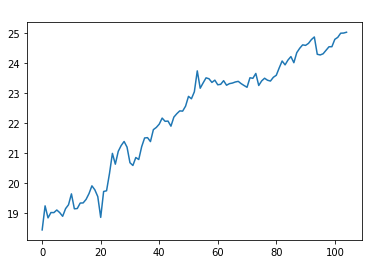

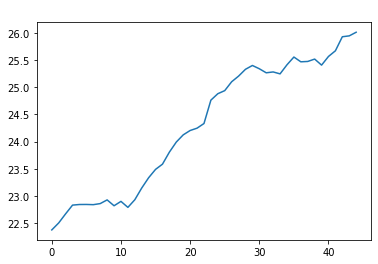

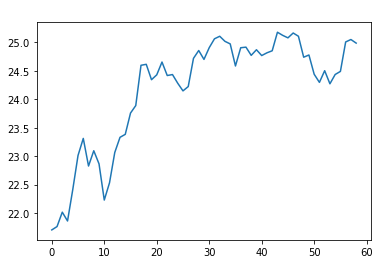

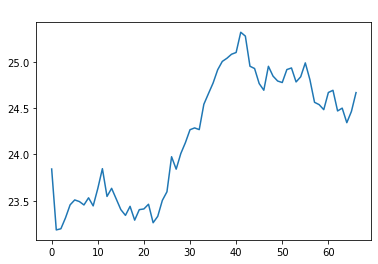

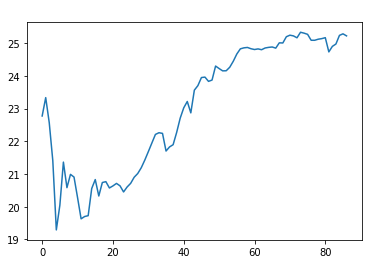

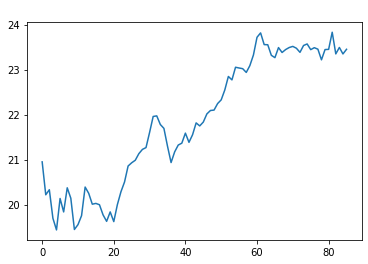

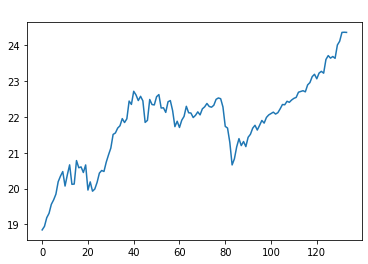

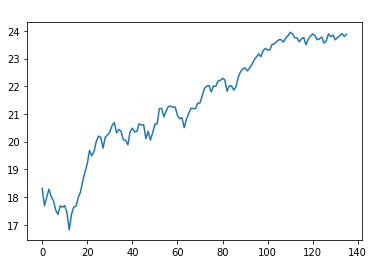

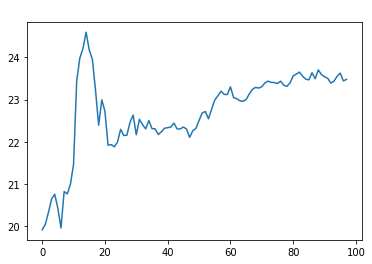

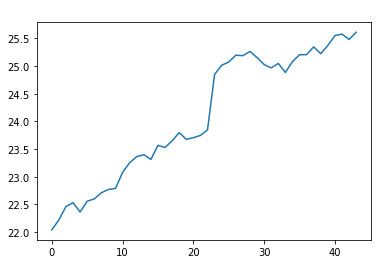

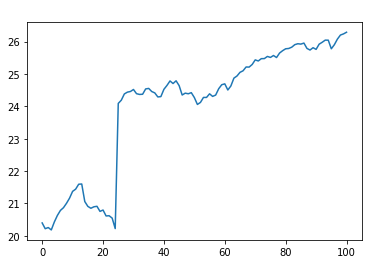

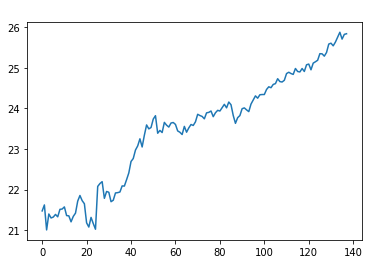

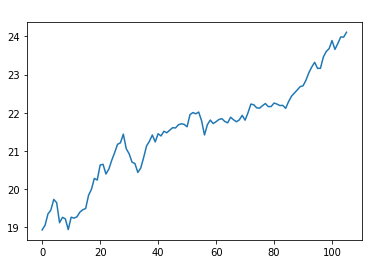

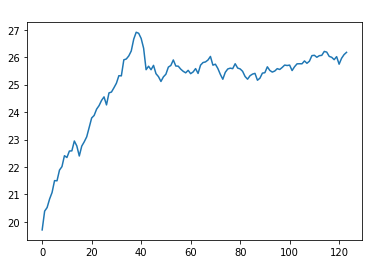

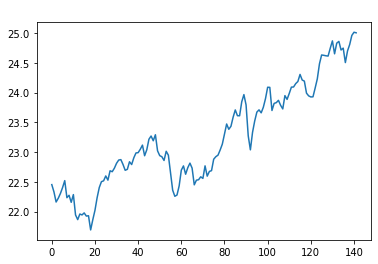

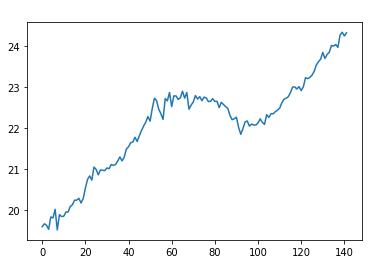

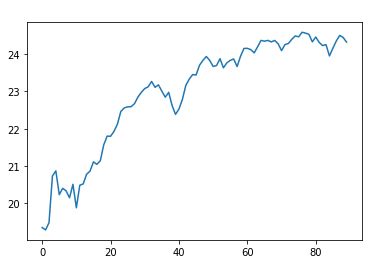

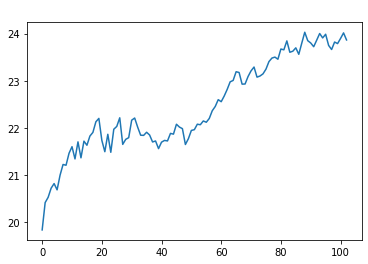

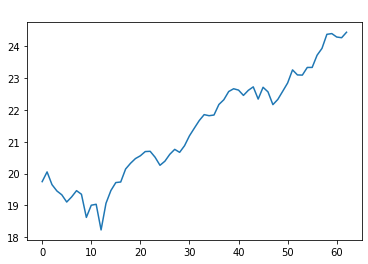

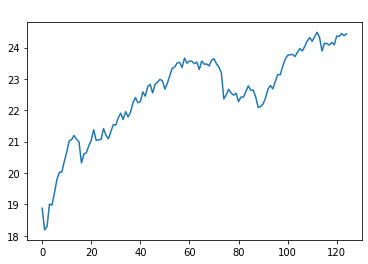

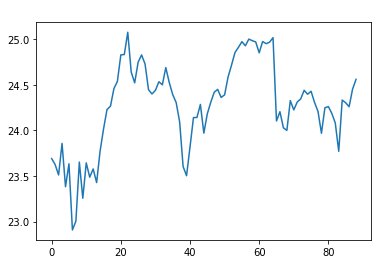

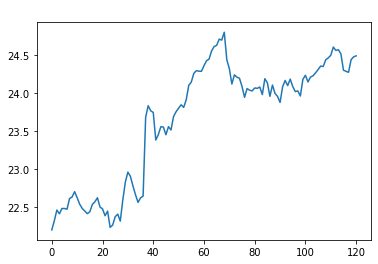

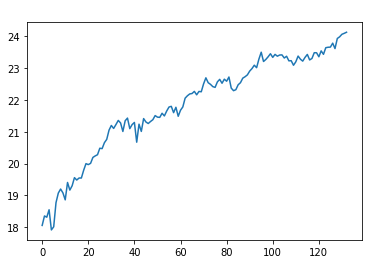

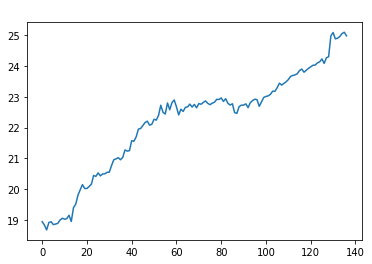

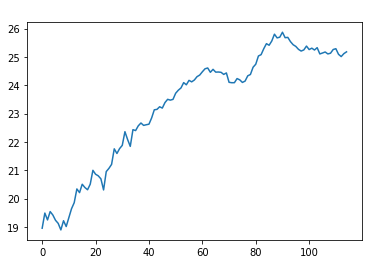

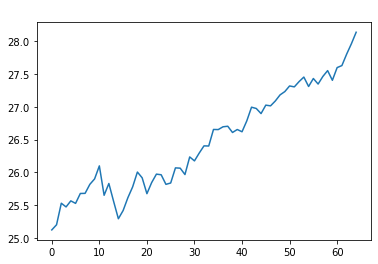

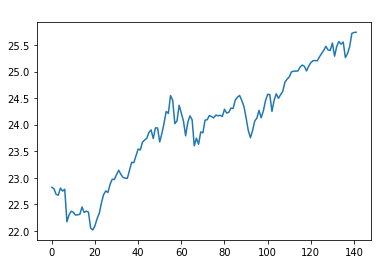

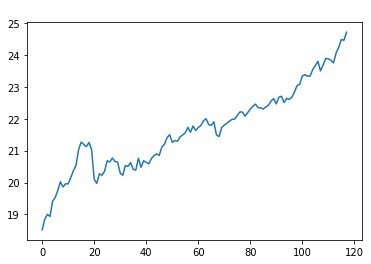

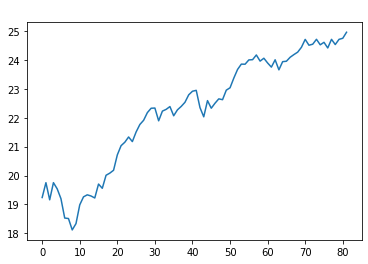

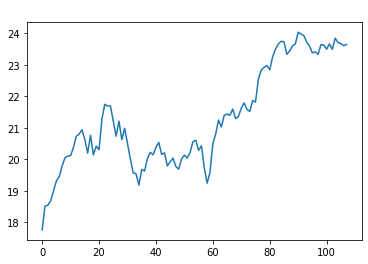

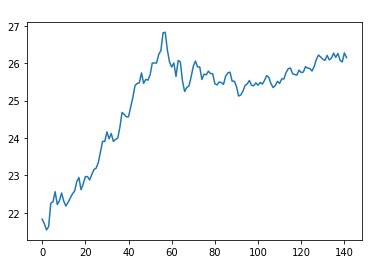

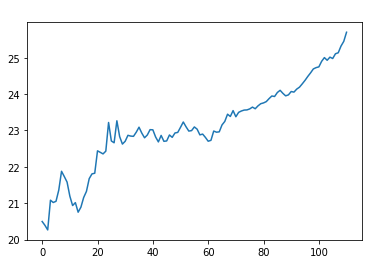

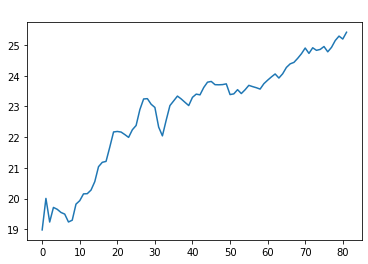

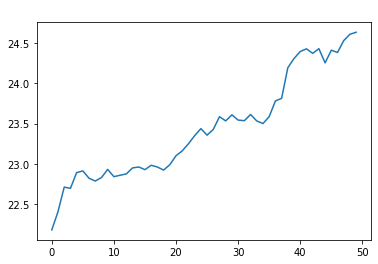

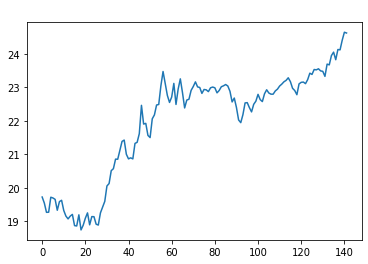

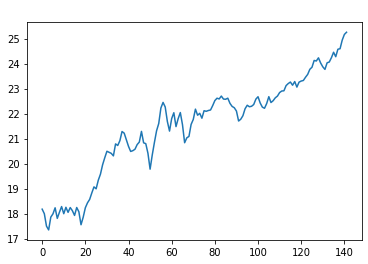

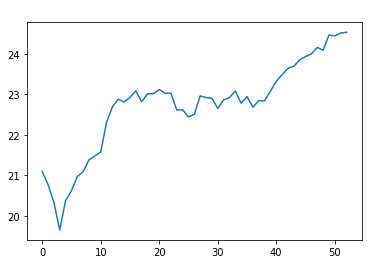

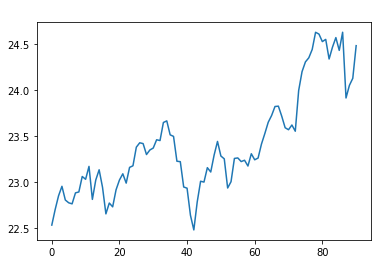

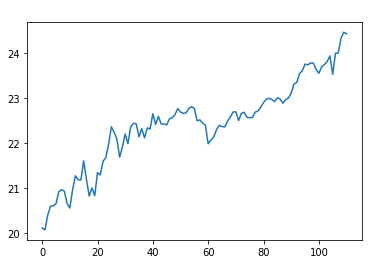

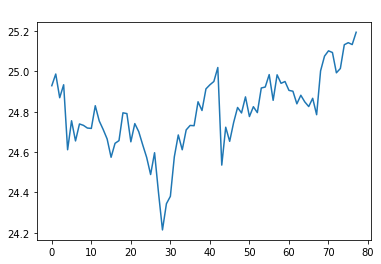

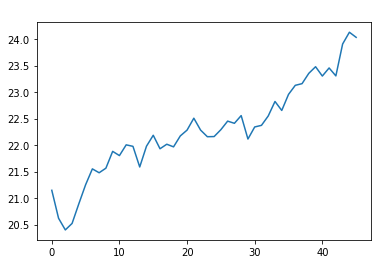

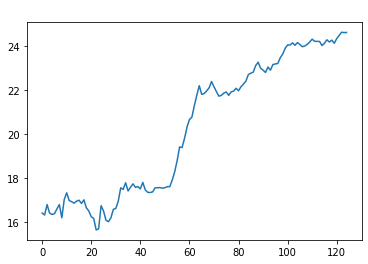

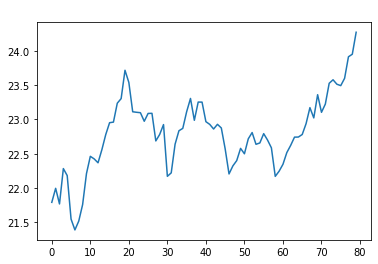

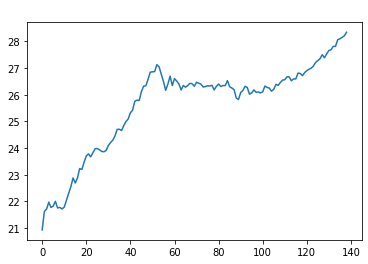

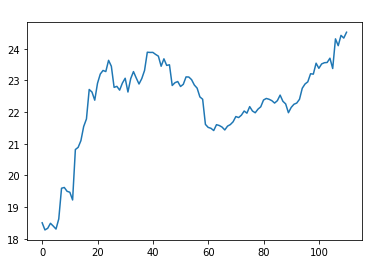

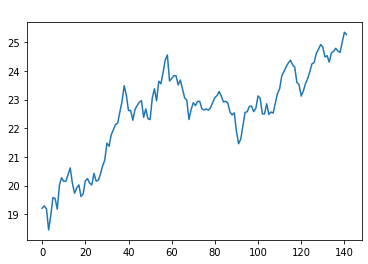

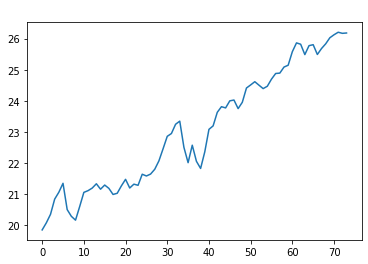

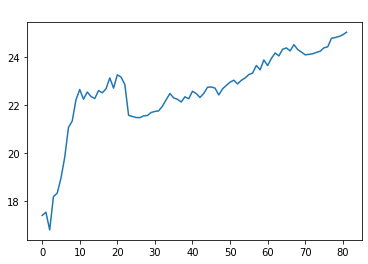

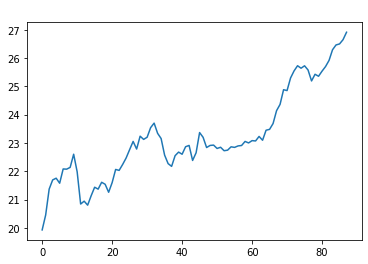

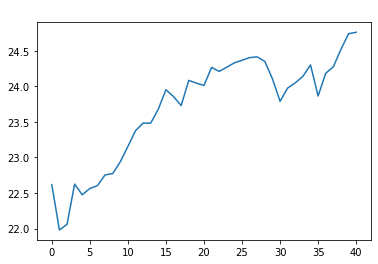

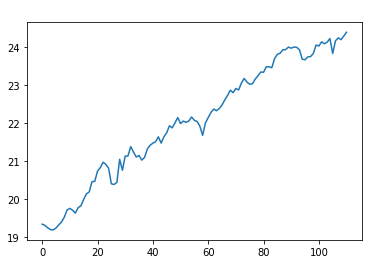

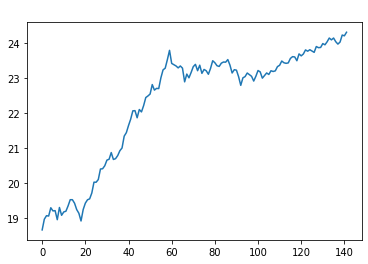

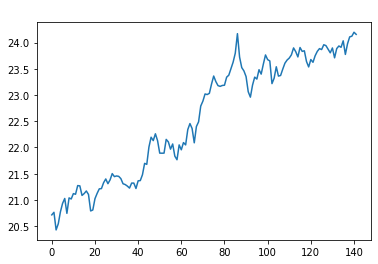

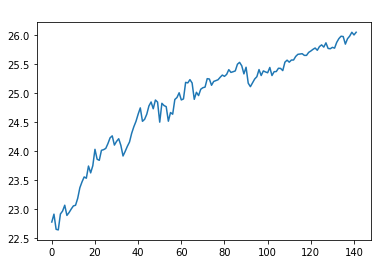

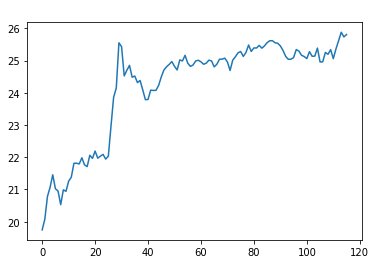

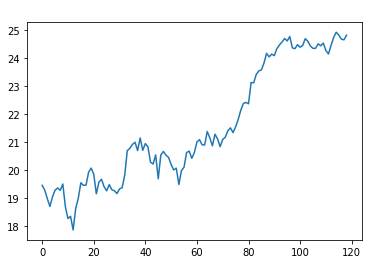

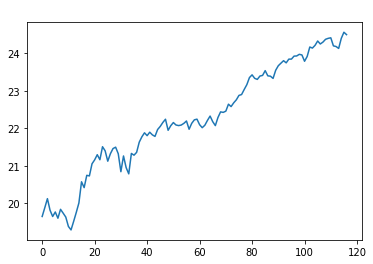

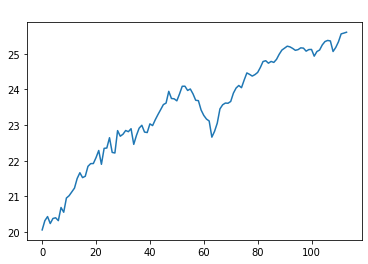

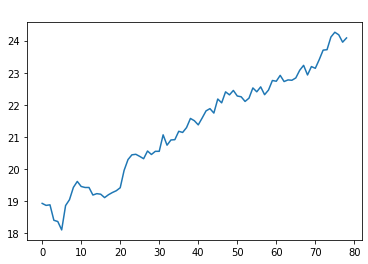

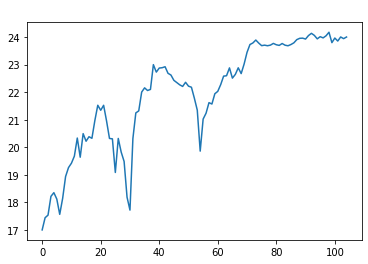

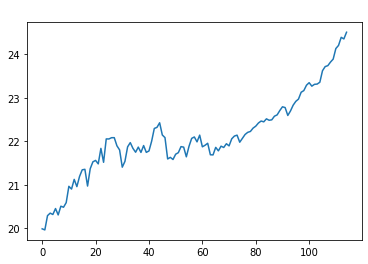

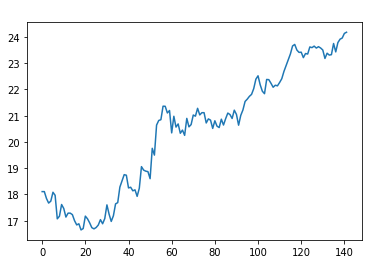

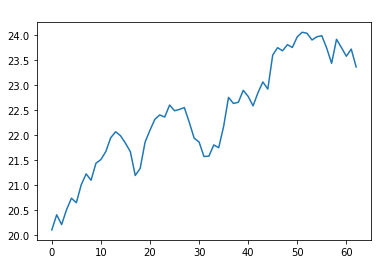

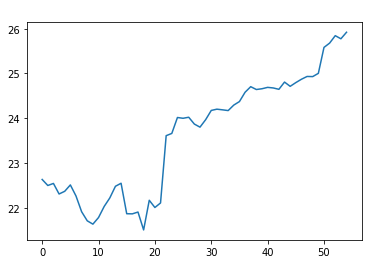

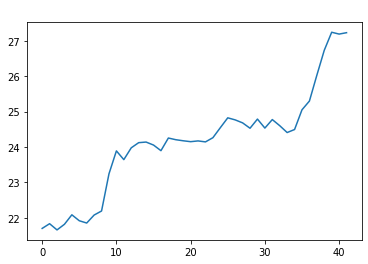

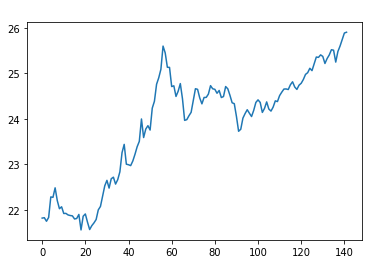

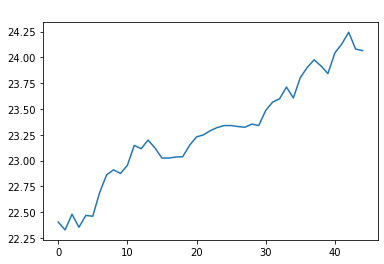

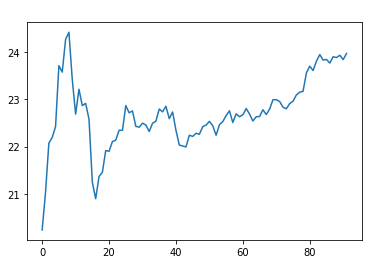

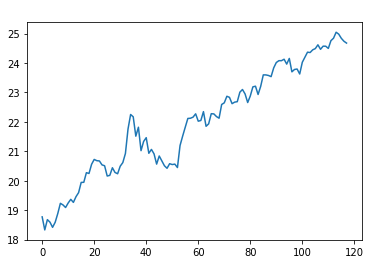

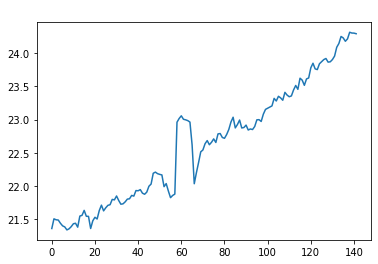

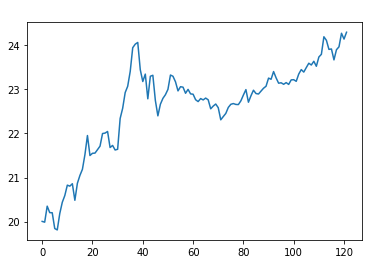

In [9]:
for i in range(len(all_data)):
    k = list(all_data.keys())
    plt.figure(i)
    plt.plot([x for x in range(len(all_data[k[i]]))], all_data[k[i]]["MarketCap"])
    plt.title(k[i],c="white",loc="left")

Proportion Down AAPL 0.5
Proportion Down ADBE 0.41
Proportion Down ADI 0.47
Proportion Down ADP 0.45
Proportion Down ADSK 0.48
Proportion Down AEP 0.3
Proportion Down ALGN 0.44
Proportion Down AMAT 0.46
Proportion Down AMD 0.54
Proportion Down AMGN 0.44
Proportion Down AMZN 0.4
Proportion Down ANSS 0.45
Proportion Down ASML 0.45
Proportion Down ATVI 0.38
Proportion Down AVGO 0.49
Proportion Down BIDU 0.46
Proportion Down BIIB 0.49
Proportion Down BKNG 0.53
Proportion Down BMRN 0.43
Proportion Down CDNS 0.48
Proportion Down CERN 0.41
Proportion Down CHKP 0.47
Proportion Down CHTR 0.39
Proportion Down CMCSA 0.41
Proportion Down COST 0.41
Proportion Down CPRT 0.45
Proportion Down CSCO 0.37
Proportion Down CSX 0.43
Proportion Down CTAS 0.4
Proportion Down CTSH 0.44
Proportion Down DLTR 0.42


/Users/austinriis-due/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Proportion Down DXCM 0.43
Proportion Down EA 0.41
Proportion Down EBAY 0.51
Proportion Down EXC 0.31
Proportion Down FAST 0.47
Proportion Down FISV 0.36
Proportion Down GILD 0.48
Proportion Down GOOGL 0.42
Proportion Down HON 0.42
Proportion Down IDXX 0.43
Proportion Down ILMN 0.35
Proportion Down INCY 0.51
Proportion Down INTC 0.48
Proportion Down INTU 0.49
Proportion Down ISRG 0.41
Proportion Down KDP 0.36
Proportion Down KLAC 0.46
Proportion Down LRCX 0.53
Proportion Down LULU 0.49
Proportion Down MAR 0.47
Proportion Down MCHP 0.44
Proportion Down MDLZ 0.55
Proportion Down MELI 0.41
Proportion Down MNST 0.49
Proportion Down MRVL 0.45
Proportion Down MSFT 0.37
Proportion Down MTCH 0.36
Proportion Down MU 0.46
Proportion Down NFLX 0.35
Proportion Down NTES 0.48
Proportion Down NVDA 0.5
Proportion Down NXPI 0.46
Proportion Down ORLY 0.4
Proportion Down PAYX 0.39
Proportion Down PCAR 0.42
Proportion Down PEP 0.42
Proportion Down QCOM 0.41
Proportion Down REGN 0.54
Proportion Down ROST 0

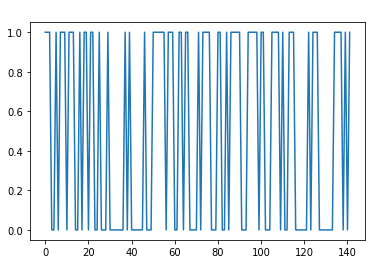

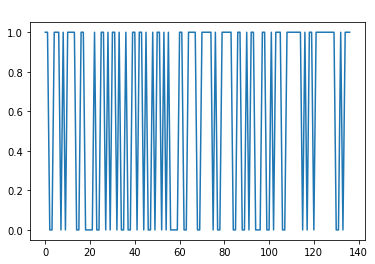

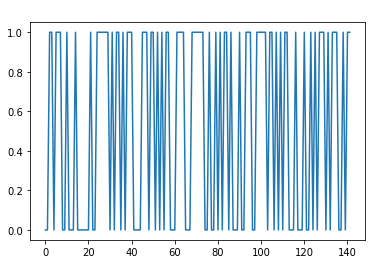

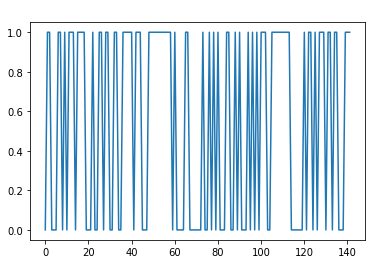

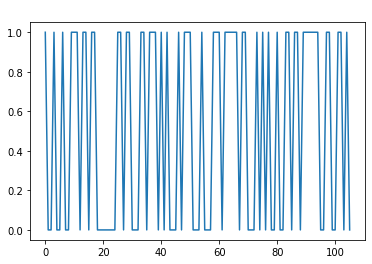

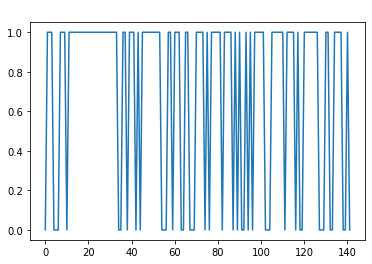

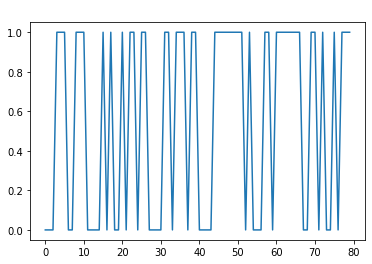

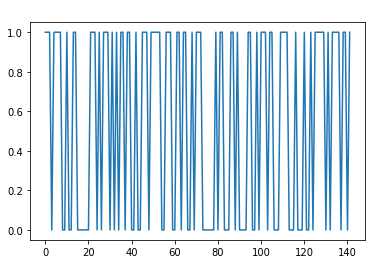

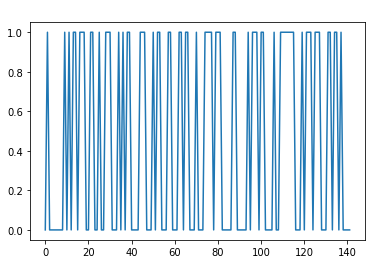

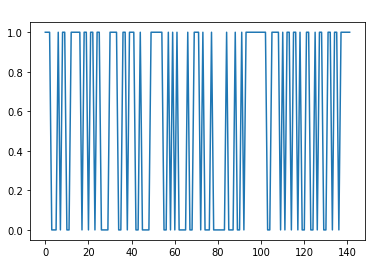

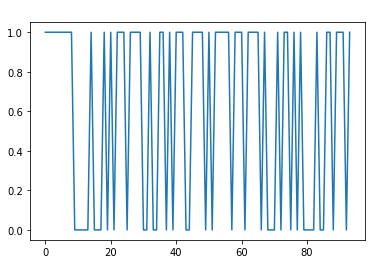

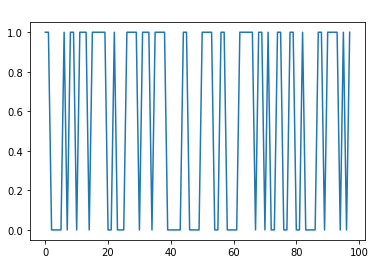

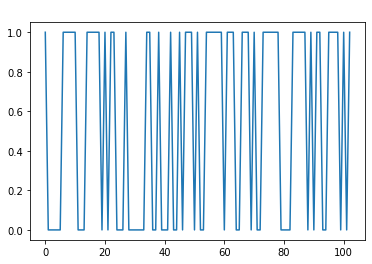

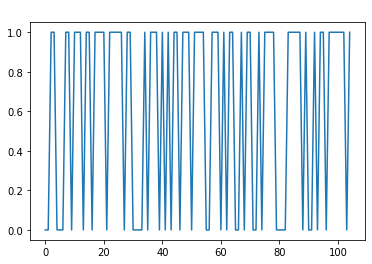

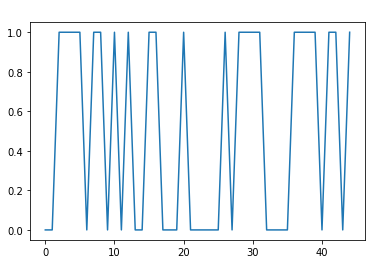

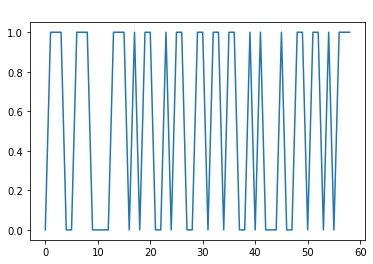

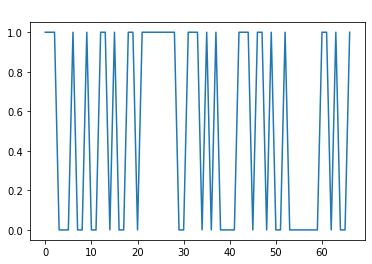

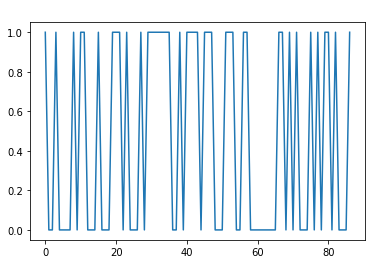

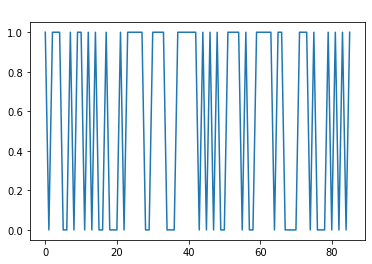

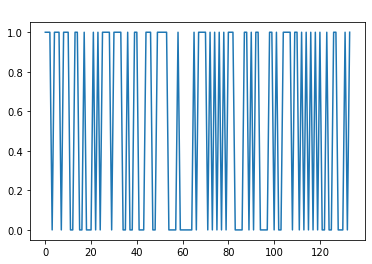

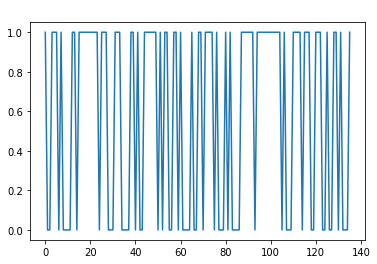

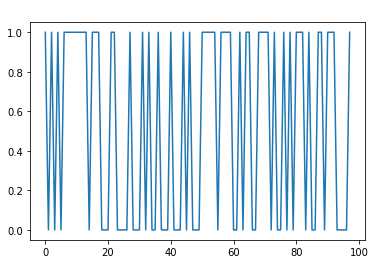

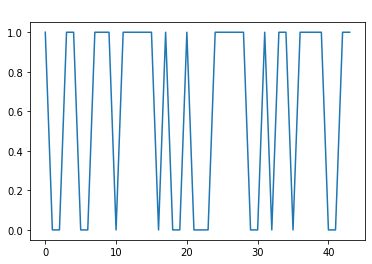

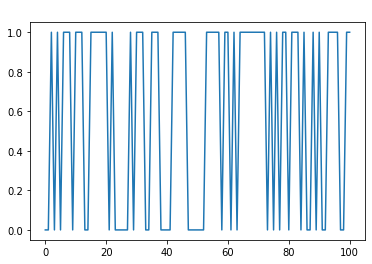

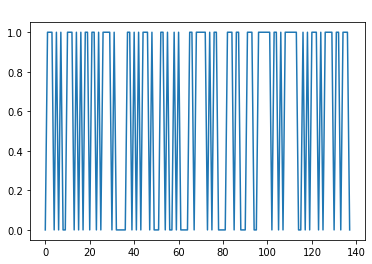

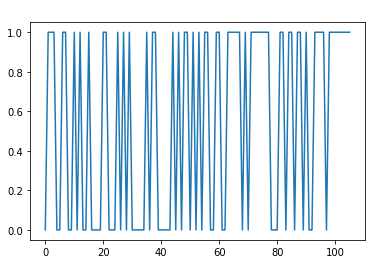

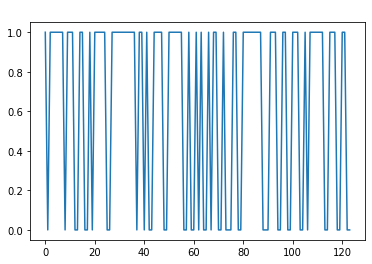

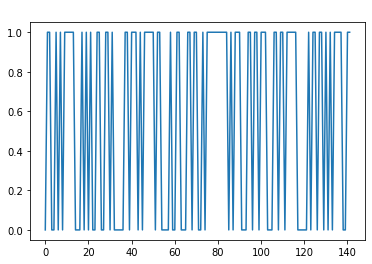

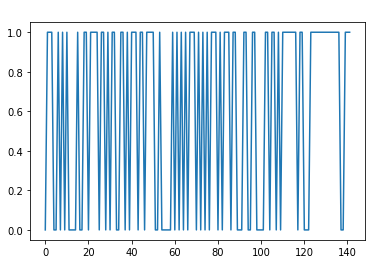

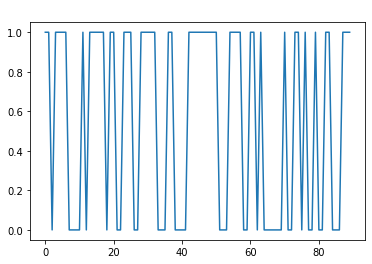

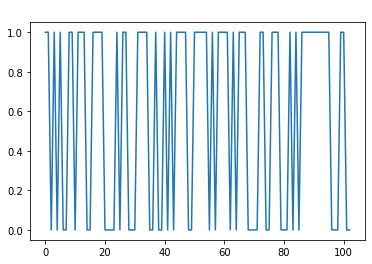

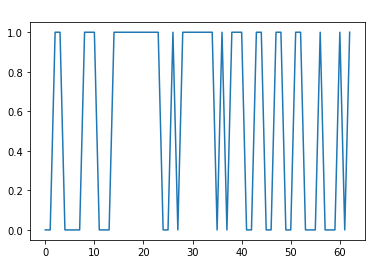

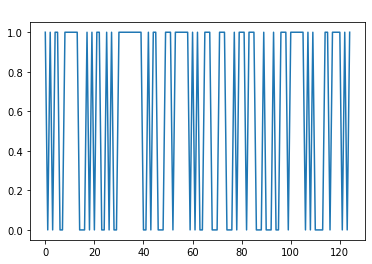

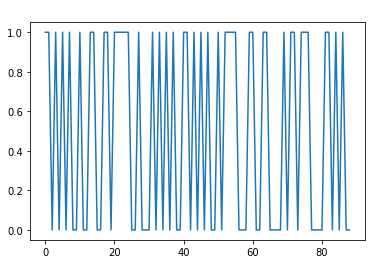

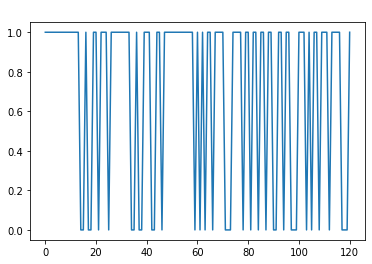

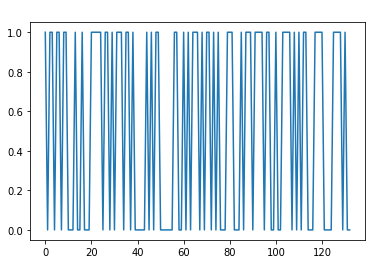

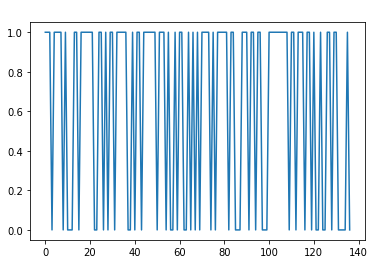

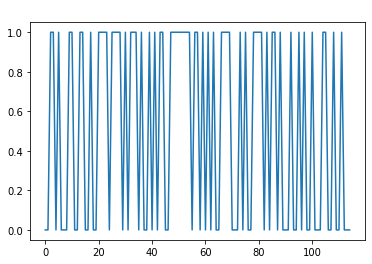

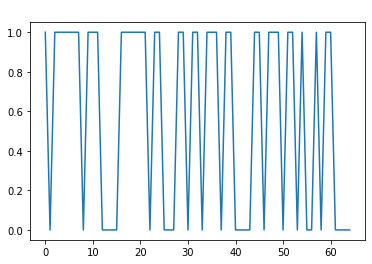

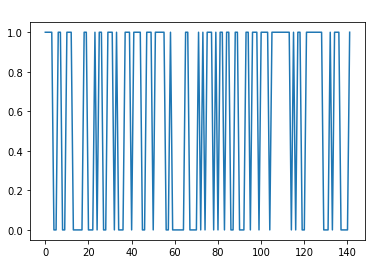

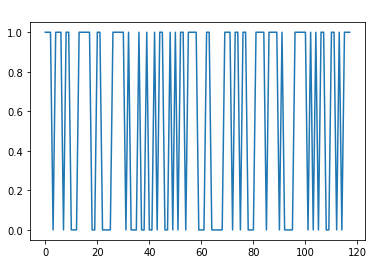

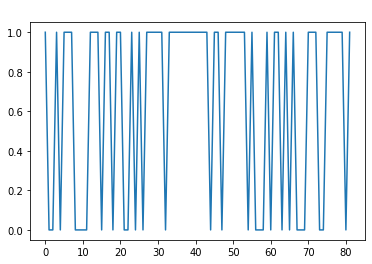

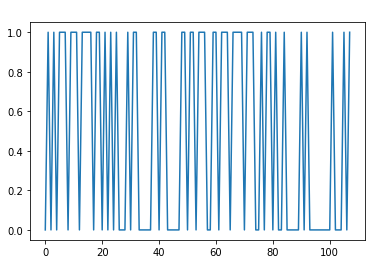

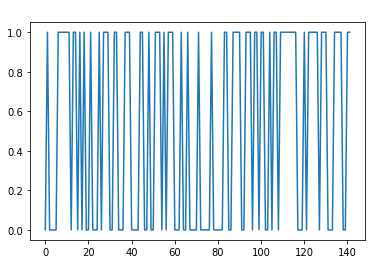

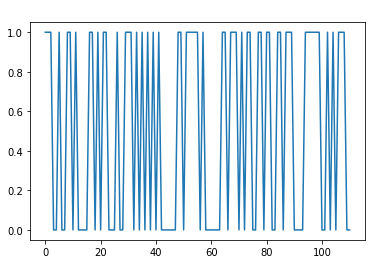

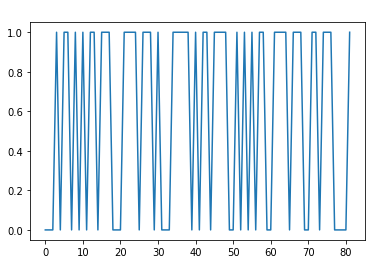

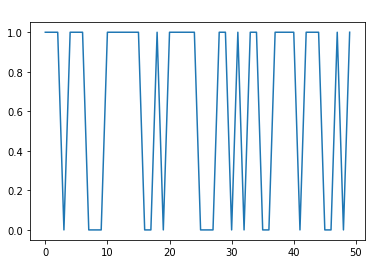

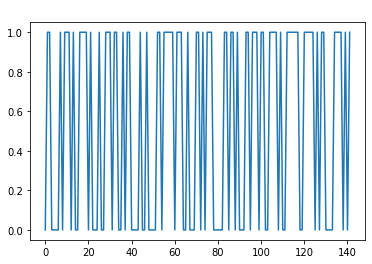

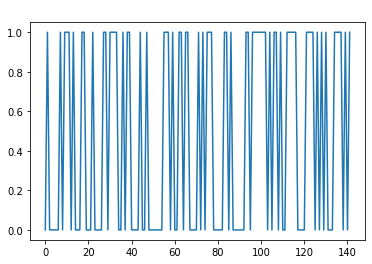

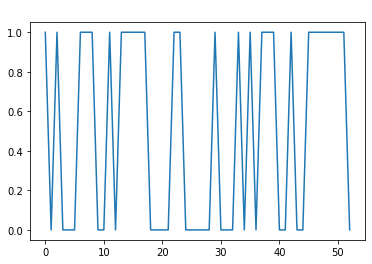

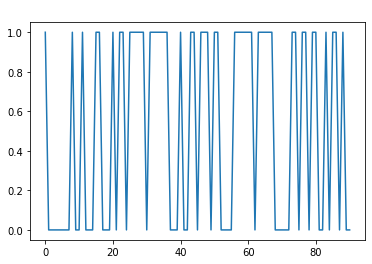

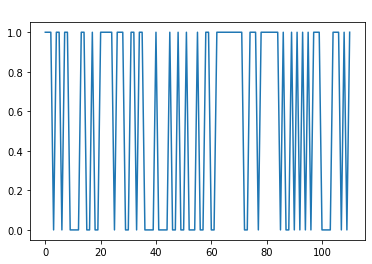

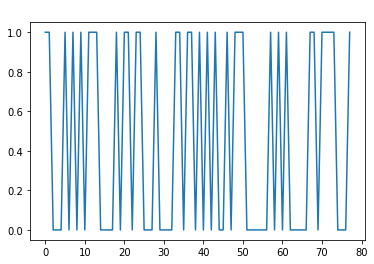

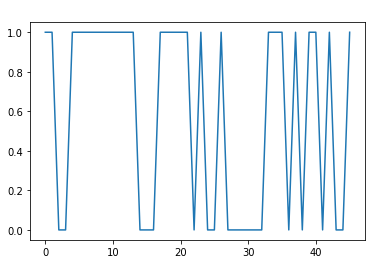

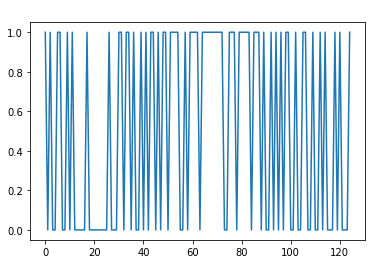

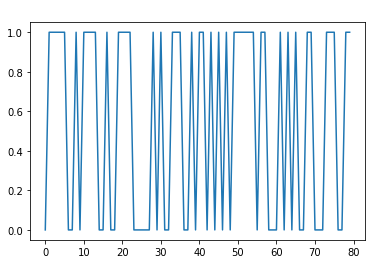

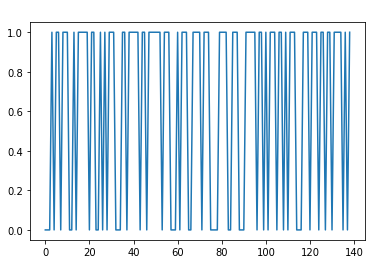

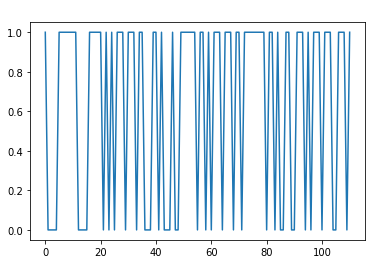

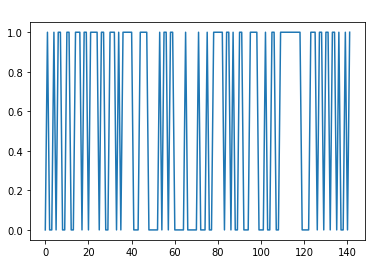

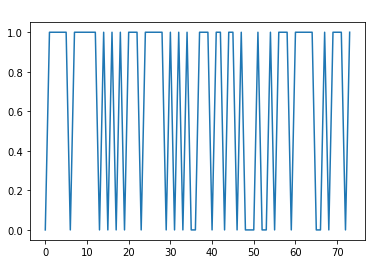

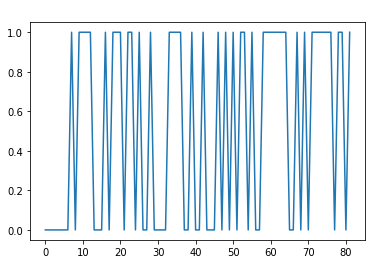

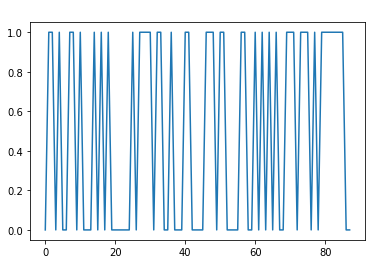

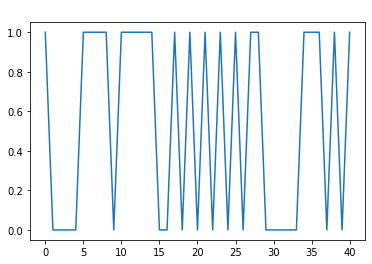

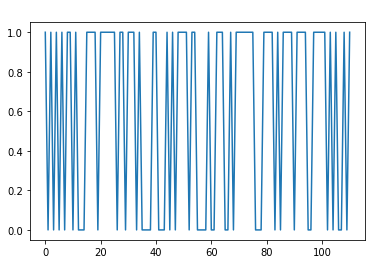

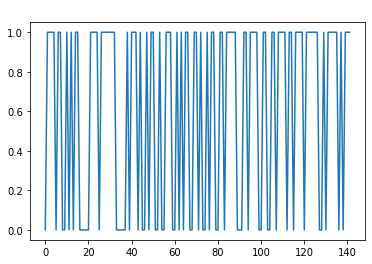

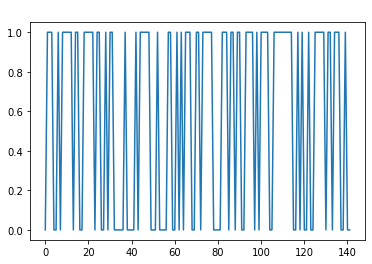

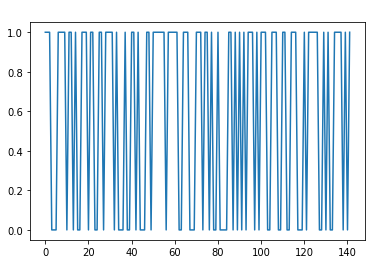

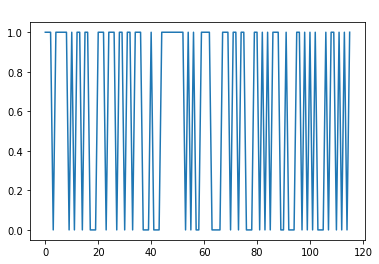

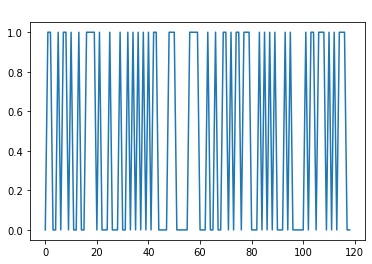

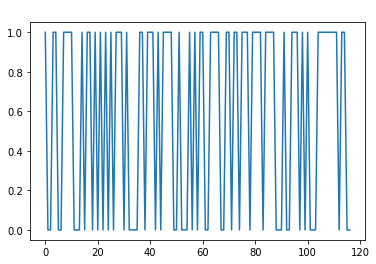

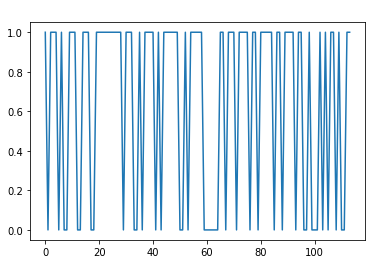

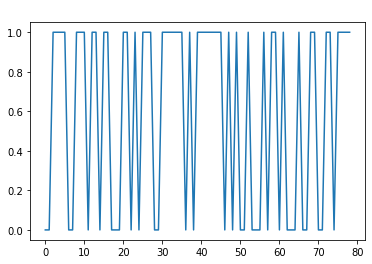

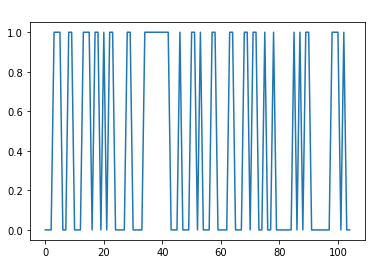

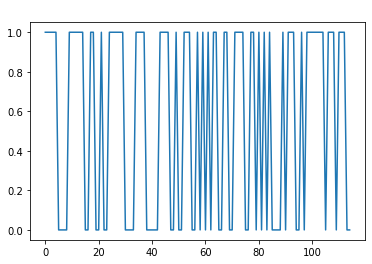

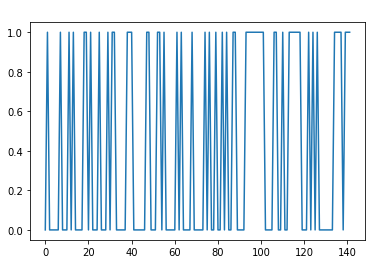

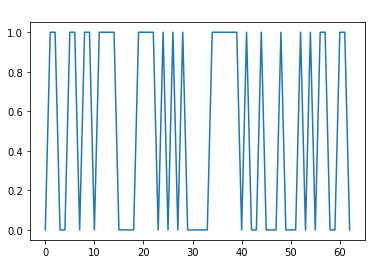

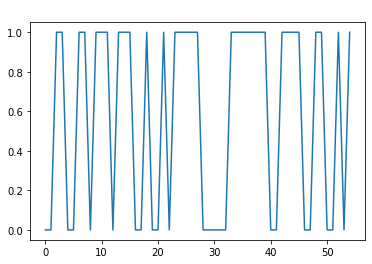

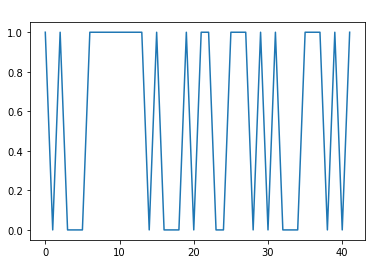

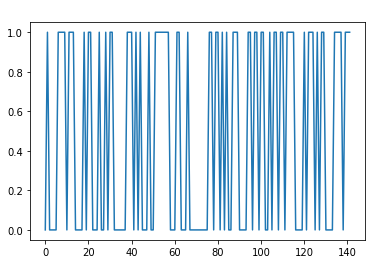

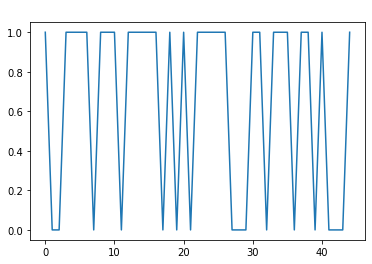

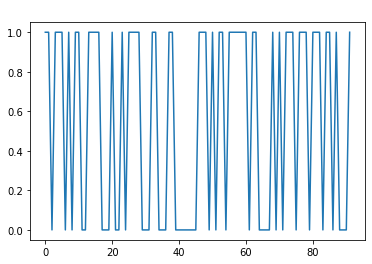

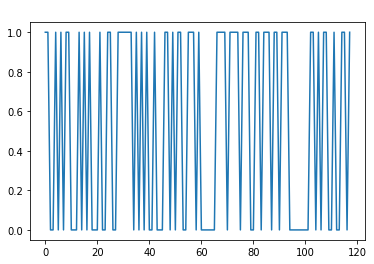

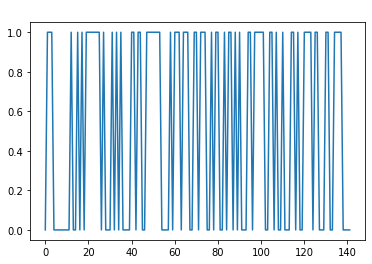

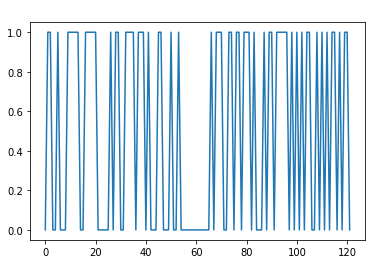

In [10]:
for i in range(len(all_data)):
    k = list(all_data.keys())
    plt.figure(i)
    plt.plot([x for x in range(len(all_data[k[i]]))], all_data[k[i]]["t0"])
    plt.title(k[i],c="white",loc="left")
    print("Proportion Down " +k[i]+" "+ 
          str(round(len(all_data[k[i]].loc[all_data[k[i]]["t0"] == 0]) / len(all_data[k[i]]),2)))

In [11]:
all_data

{'AAPL':      MMYYYY  t0   t1   PeRatio  MarketCap
 0    091985   1  1.0  2.949112  21.294182
 1    121985   1  1.0  2.755824  21.549129
 2    031986   1  0.0  2.636124  21.464268
 3    061986   0  0.0  2.825833  21.670385
 4    091986   0  1.0  3.274651  22.119388
 ..      ...  ..  ...       ...        ...
 137  122019   1  0.0  3.350676  28.077488
 138  032020   0  1.0  3.558799  28.307062
 139  062020   1  0.0  3.700166  28.434044
 140  092020   0  1.0  3.494232  28.343104
 141  122020   1  1.0  3.422306  28.449760
 
 [142 rows x 5 columns], 'ADBE':      MMYYYY  t0   t1   PeRatio  MarketCap
 0    111986   1  1.0  4.591923  20.029024
 1    021987   1  0.0  3.683515  19.629814
 2    051987   0  0.0  3.216112  19.313283
 3    081987   0  1.0  3.107229  19.491514
 4    111987   1  1.0  3.302408  19.690969
 ..      ...  ..  ...       ...        ...
 132  112019   1  0.0  4.070325  25.946687
 133  022020   0  1.0  4.215529  26.230332
 134  052020   1  1.0  4.098685  26.157805
 135  082020

In [35]:
len(all_data)

84

In [12]:
npdf = pd.DataFrame()
tk = []
my = []
t0 = []
t1 = []
ps = []
mc = []
for x in all_data.keys():
    tk.extend([x for y in range(len(all_data[x]))])
    my.extend([x for x in all_data[x]["MMYYYY"]])
    t0.extend([x for x in all_data[x]["t0"]])
    t1.extend([x for x in all_data[x]["t1"]])
    ps.extend([x for x in all_data[x]["PeRatio"]])
    mc.extend([x for x in all_data[x]["MarketCap"]])
npdf["Ticker"] = tk
npdf["MMYYYY"] = my
npdf["t0"] = t0
npdf["t1"] = t1
npdf["PeRatio"] = ps
npdf["MarketCap"] = mc
npdf.head()

Ticker  MMYYYY  t0   t1   PeRatio  MarketCap
0   AAPL  091985   1  1.0  2.949112  21.294182
1   AAPL  121985   1  1.0  2.755824  21.549129
2   AAPL  031986   1  0.0  2.636124  21.464268
3   AAPL  061986   0  0.0  2.825833  21.670385
4   AAPL  091986   0  1.0  3.274651  22.119388

In [13]:
np.random.seed(20)
test_comps = np.random.choice(list(all_data.keys()),1, replace = False)
test = npdf.iloc[np.where(npdf["Ticker"] == test_comps[0])]
train = npdf.iloc[np.where(npdf["Ticker"] != test_comps[0])]
train.reset_index(drop = True,inplace = True)
test.reset_index(drop = True,inplace = True)
test_comps[0]

'ILMN'

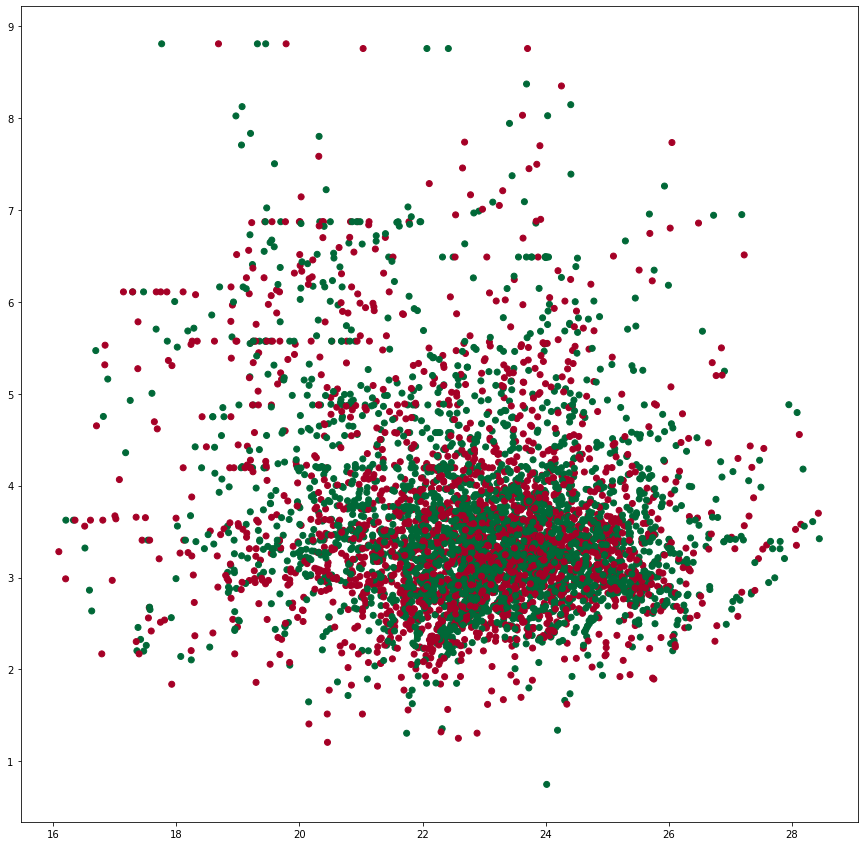

In [14]:
npdfu = train.loc[npdf["t0"] == 1]
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.scatter(npdfu["MarketCap"],npdfu["PeRatio"], c = npdfu["t1"],cmap = "RdYlGn")
plt.show()

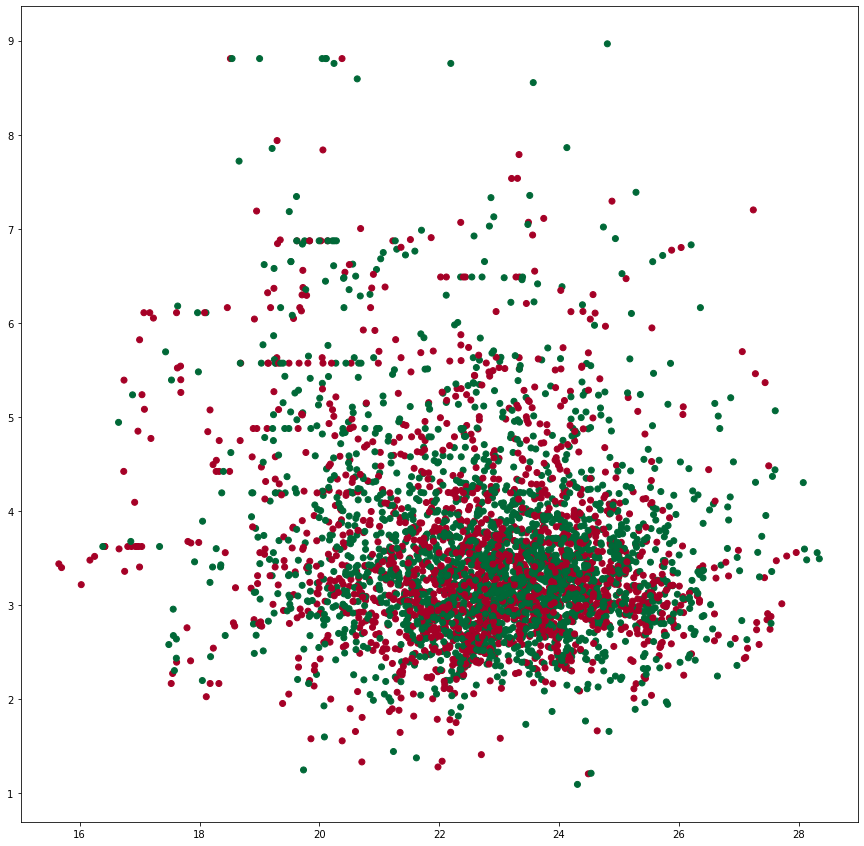

In [15]:
npdfd = train.loc[npdf["t0"] == 0]
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.scatter(npdfd["MarketCap"],npdfd["PeRatio"], c = npdfd["t1"],cmap = "RdYlGn")
plt.show()

In [16]:
len(npdfd), len(npdfu)

(3914, 4916)

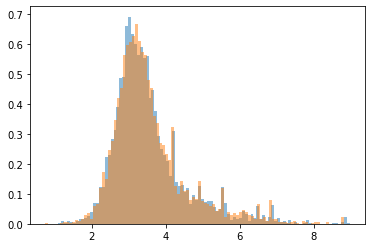

In [17]:
plt.hist(npdfd["PeRatio"],bins=100,density = True,alpha = 0.5)
plt.hist(npdfu["PeRatio"],bins=100,density = True,alpha=0.5)
plt.show()

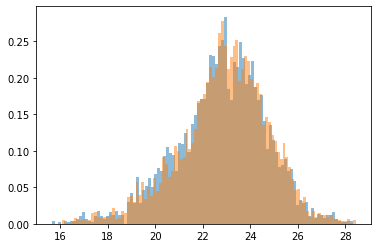

In [18]:
plt.hist(npdfd["MarketCap"],bins=100,density = True,alpha = 0.5)
plt.hist(npdfu["MarketCap"],bins=100,density = True,alpha=0.5)
plt.show()

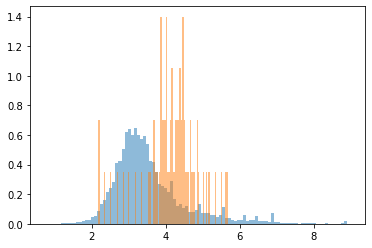

count    8830.000000
mean        3.568245
std         1.018753
min         0.748109
25%         2.931194
50%         3.337405
75%         3.919242
max         8.966867
Name: PeRatio, dtype: float64

In [19]:
plt.hist(train["PeRatio"],bins=100,density = True,alpha = 0.5)
plt.hist(test["PeRatio"],bins=100,density = True,alpha=0.5)
plt.show()
train["PeRatio"].describe()

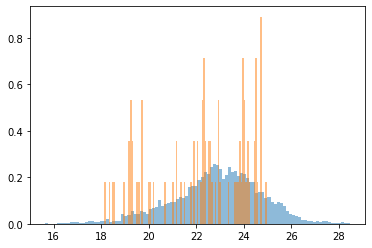

count    8830.000000
mean       22.857251
std         1.878900
min        15.652343
25%        21.792151
50%        22.963678
75%        24.110304
max        28.449760
Name: MarketCap, dtype: float64

In [20]:
plt.hist(train["MarketCap"],bins=100,density = True,alpha = 0.5)
plt.hist(test["MarketCap"],bins=100,density = True,alpha = 0.5)
plt.show()
train["MarketCap"].describe()

In [21]:
corrs = pd.DataFrame(columns=returns.keys(),index=returns.keys())
for a in returns.keys():
    for b in returns.keys():
        corrs[a][b] = round(st.pearsonr(returns[a][:min(len(returns[a]),len(returns[b]))],returns[b][:min(len(returns[a]),len(returns[b]))])[0],2)
        if abs(corrs[a][b]) > 0.5 and a != b and a != 'CRWD' and b != 'CRWD':
            print(corrs[a][b],a,b)

0.51 AAPL DOCU
0.6 AAPL MRNA
0.68 ADI AMAT
0.51 ADI AMD
0.69 ADI KLAC
0.55 ADI LRCX
0.55 ADI PCAR
0.68 ADI TXN
0.67 ADP DOCU
0.53 ADP FOX
0.56 ADP FOXA
0.52 ADP PAYX
-0.52 ADSK FOX
-0.53 ADSK FOXA
-0.79 ADSK PDD
0.62 AEP EXC
0.65 AEP XEL
-0.59 ALGN PTON
-0.54 ALGN ZM
0.68 AMAT ADI
0.56 AMAT AMD
0.65 AMAT INTC
0.77 AMAT KLAC
0.75 AMAT LRCX
0.65 AMAT MU
0.54 AMAT TEAM
0.7 AMAT TXN
0.51 AMD ADI
0.56 AMD AMAT
0.52 AMD KLAC
0.53 AMZN PDD
-0.6 ANSS PTON
0.53 ASML DLTR
0.55 ASML PDD
-0.65 ATVI PTON
-0.62 ATVI ZM
0.51 AVGO FOX
0.57 AVGO FOXA
0.52 AVGO PTON
0.56 BIDU DOCU
0.53 BIDU FOXA
0.51 BIIB FOX
0.58 BKNG DOCU
0.52 BMRN PTON
-0.66 CHKP DOCU
0.6 CHTR FOX
0.65 CHTR FOXA
0.57 CMCSA DOCU
0.67 CMCSA FOX
0.62 CMCSA FOXA
0.65 CPRT FOXA
-0.64 CPRT MRNA
-0.56 CPRT OKTA
0.77 CSX FOX
0.79 CSX FOXA
0.58 CSX PCAR
0.63 CSX PTON
0.53 CSX TEAM
0.71 CTAS FOX
0.72 CTAS FOXA
0.53 CTAS PAYX
0.55 CTAS PCAR
0.53 CTAS PEP
0.53 DLTR ASML
0.51 DOCU AAPL
0.67 DOCU ADP
0.56 DOCU BIDU
0.58 DOCU BKNG
-0.66 DOCU CHKP
0

In [22]:
corrs

AAPL  ADBE   ADI   ADP  ADSK   AEP  ALGN  AMAT   AMD  AMGN  ...  TMUS  \
AAPL     1 -0.03  0.33  0.25 -0.17  0.02     0  0.36  0.35  0.23  ... -0.05   
ADBE -0.03     1  0.06  0.04 -0.08 -0.11  0.03  0.16 -0.03 -0.04  ... -0.17   
ADI   0.33  0.06     1  0.45 -0.07  0.08 -0.01  0.68  0.51  0.04  ... -0.16   
ADP   0.25  0.04  0.45     1  -0.1  0.37   0.2  0.39  0.21  0.26  ... -0.26   
ADSK -0.17 -0.08 -0.07  -0.1     1 -0.02  0.03 -0.26 -0.14 -0.15  ...  0.08   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
VRTX  0.08  0.16  0.04  0.13 -0.13 -0.03  0.09  0.15  0.06  0.09  ...  0.03   
WDAY  0.36  -0.1  0.07  0.13 -0.08  0.02  0.03   0.1  0.17  0.34  ...  0.07   
XEL   0.13  -0.1  0.24  0.37 -0.02  0.65  0.04  0.09  0.05 -0.01  ... -0.13   
XLNX -0.04 -0.04  0.06   0.1 -0.03  0.03  -0.1  0.05 -0.08     0  ... -0.06   
ZM   -0.03 -0.22  0.09  0.11  0.28  0.09 -0.54 -0.13 -0.22  0.28  ...   0.5   

      TSLA   TXN  VRSK  VRSN  VRTX  WDAY   XEL  XLNX    ZM  
AAPL  0.06  0.29  0.15  0.17  0.08  0.36  0.13 -0.04 -0.03  
ADBE -0.28  0.11  0.37   0.1  0.16  -0.1  -0.1 -0.04 -0.22  
ADI  -0.12  0.68  0.13  0.16  0.04  0.07  0.24  0.06  0.09  
ADP  -0.23  0.29  0.14  0.29  0.13  0.13  0.37   0.1  0.11  
ADSK  0.14 -0.21 -0.33 -0.01 -0.13 -0.08 -0.02 -0.03  0.28  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
VRTX -0.21 -0.08  0.09  0.02     1 -0.01  0.03  0.03  0.04  
WDAY -0.02  0.17 -0.09 -0.06 -0.01     1  0.03  0.01  0.35  
XEL   0.23  0.02 -0.02   0.1  0.03  0.03     1  0.02  0.23  
XLNX -0.11    -0 -0.04     0  0.03  0.01  0.02     1 -0.02  
ZM    0.31   0.2 -0.71  0.06  0.04  0.35  0.23 -0.02     1  

[102 rows x 102 columns]

In [23]:
for x in all_data.keys():
    print('-'*30)
    print(x)
    print(round(all_data[x][['PeRatio','MarketCap']].describe(),2))
    print('-'*30)

------------------------------
AAPL
       PeRatio  MarketCap
count   142.00     142.00
mean      3.12      24.33
std       0.70       2.27
min       1.92      21.24
25%       2.63      22.36
50%       2.92      23.35
75%       3.48      26.78
max       5.60      28.45
------------------------------
------------------------------
ADBE
       PeRatio  MarketCap
count   137.00     137.00
mean      3.56      22.86
std       0.61       1.75
min       2.35      19.31
25%       3.09      21.62
50%       3.52      23.23
75%       3.93      23.88
max       5.83      26.23
------------------------------
------------------------------
ADI
       PeRatio  MarketCap
count   142.00     142.00
mean      3.41      22.54
std       0.51       1.46
min       2.42      19.41
25%       3.10      21.67
50%       3.33      23.05
75%       3.67      23.51
max       5.13      24.85
------------------------------
------------------------------
ADP
       PeRatio  MarketCap
count   142.00     142.00
mean      3

       PeRatio  MarketCap
count   121.00     121.00
mean      2.76      23.65
std       0.42       0.80
min       2.25      22.20
25%       2.46      22.65
50%       2.68      24.00
75%       2.95      24.27
max       5.33      24.80
------------------------------
------------------------------
FAST
       PeRatio  MarketCap
count   133.00     133.00
mean      3.49      21.83
std       0.26       1.56
min       2.91      17.92
25%       3.30      21.10
50%       3.49      22.20
75%       3.65      23.23
max       4.14      24.12
------------------------------
------------------------------
FISV
       PeRatio  MarketCap
count   137.00     137.00
mean      3.21      22.19
std       0.38       1.67
min       2.45      18.67
25%       2.94      20.98
50%       3.17      22.69
75%       3.42      23.08
max       4.49      25.10
------------------------------
------------------------------
GILD
       PeRatio  MarketCap
count   115.00     115.00
mean      3.73      23.26
std       1.03     

max       6.49      25.92
------------------------------
------------------------------
TSLA
       PeRatio  MarketCap
count    42.00      42.00
mean      4.48      24.12
std       1.67       1.48
min       1.77      21.66
25%       3.07      23.70
50%       4.50      24.19
75%       5.93      24.74
max       7.20      27.24
------------------------------
------------------------------
TXN
       PeRatio  MarketCap
count   142.00     142.00
mean      3.32      23.88
std       0.85       1.23
min       2.20      21.56
25%       2.87      22.74
50%       3.14      24.33
75%       3.54      24.71
max       6.88      25.90
------------------------------
------------------------------
VRSK
       PeRatio  MarketCap
count    45.00      45.00
mean      3.48      23.28
std       0.24       0.52
min       3.13      22.33
25%       3.33      23.02
50%       3.43      23.29
75%       3.57      23.61
max       4.09      24.24
------------------------------
------------------------------
VRSN
     

In [24]:
per=[]
for x in all_data.keys():
    print('-'*7)
    print(x +":",round(all_data[x][['t0']].count(),0)[0])
    per.append(round(all_data[x][['t0']].count(),0)[0])

-------
AAPL: 142
-------
ADBE: 137
-------
ADI: 142
-------
ADP: 142
-------
ADSK: 106
-------
AEP: 142
-------
ALGN: 80
-------
AMAT: 142
-------
AMD: 142
-------
AMGN: 142
-------
AMZN: 94
-------
ANSS: 98
-------
ASML: 103
-------
ATVI: 105
-------
AVGO: 45
-------
BIDU: 59
-------
BIIB: 67
-------
BKNG: 87
-------
BMRN: 86
-------
CDNS: 134
-------
CERN: 136
-------
CHKP: 98
-------
CHTR: 44
-------
CMCSA: 101
-------
COST: 138
-------
CPRT: 106
-------
CSCO: 124
-------
CSX: 142
-------
CTAS: 142
-------
CTSH: 90
-------
DLTR: 103
-------
DXCM: 63
-------
EA: 125
-------
EBAY: 89
-------
EXC: 121
-------
FAST: 133
-------
FISV: 137
-------
GILD: 115
-------
GOOGL: 65
-------
HON: 142
-------
IDXX: 118
-------
ILMN: 82
-------
INCY: 108
-------
INTC: 142
-------
INTU: 111
-------
ISRG: 82
-------
KDP: 50
-------
KLAC: 142
-------
LRCX: 142
-------
LULU: 53
-------
MAR: 91
-------
MCHP: 111
-------
MDLZ: 78
-------
MELI: 46
-------
MNST: 125
-------
MRVL: 80
-------
MSFT: 139
-----

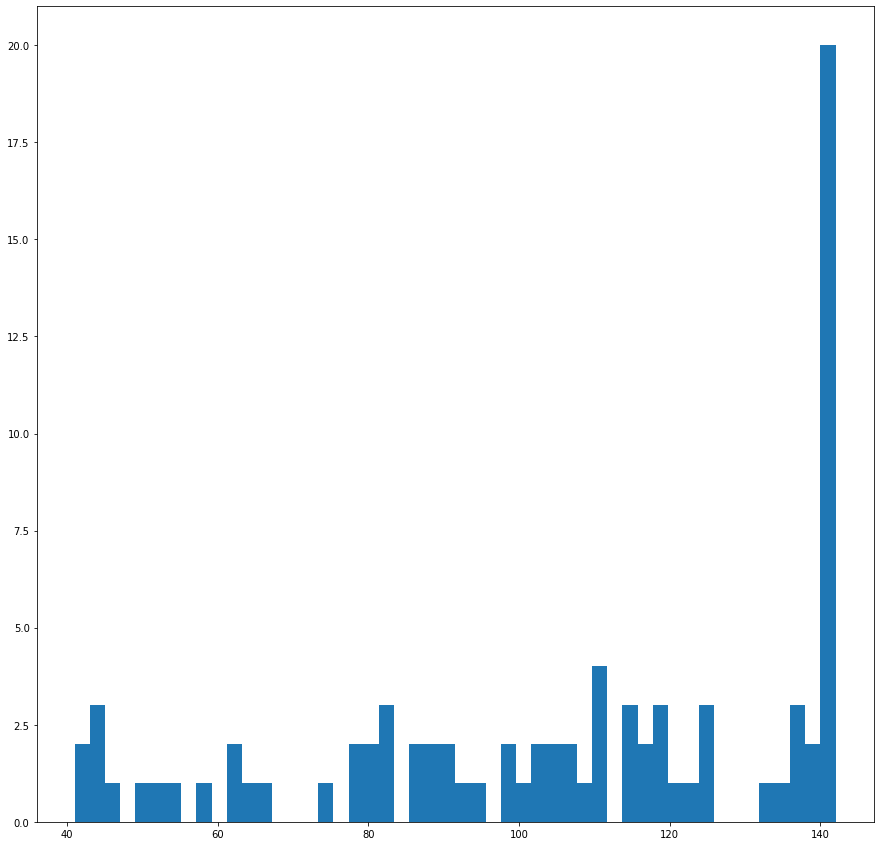

count     84.000000
mean     106.095238
std       31.765185
min       41.000000
10%       56.200000
20%       79.600000
30%       88.900000
40%      103.000000
50%      111.000000
60%      118.000000
70%      134.200000
80%      142.000000
90%      142.000000
max      142.000000
dtype: float64

In [25]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.hist(per,bins=50)
plt.show()
pd.Series(per).describe(percentiles = [0.1+0.1*i for i in range(9)])

In [26]:
avgcap = []
avgpe = []
for x in all_data.keys():
    avgcap.append(all_data[x]["MarketCap"].mean())
    avgpe.append(all_data[x]["PeRatio"].mean())

(array([ 2.,  6., 14., 21., 13., 11., 10.,  5.,  1.,  1.]),
 array([20.25334054, 20.87456397, 21.4957874 , 22.11701082, 22.73823425,
        23.35945767, 23.9806811 , 24.60190452, 25.22312795, 25.84435137,
        26.4655748 ]),
 <a list of 10 Patch objects>)

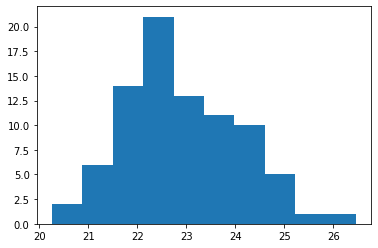

In [27]:
plt.hist(avgcap)

(array([10., 28., 20.,  9., 10.,  3.,  2.,  1.,  0.,  1.]),
 array([2.69324721, 3.05162066, 3.40999411, 3.76836756, 4.12674101,
        4.48511446, 4.84348791, 5.20186136, 5.56023481, 5.91860826,
        6.2769817 ]),
 <a list of 10 Patch objects>)

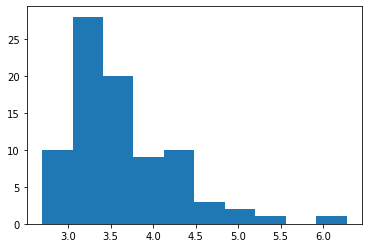

In [28]:
plt.hist(avgpe)

In [29]:
pd.DataFrame(avgpe,columns=["avgpe"]).quantile(0.75)[0]+1.5*(pd.DataFrame(avgpe,columns=["avgpe"]).quantile(0.75)[0] - pd.DataFrame(avgpe,columns=["avgpe"]).quantile(0.25)[0])

5.030326210863289

In [30]:
pd.DataFrame(avgpe,columns=["avgpe"]).quantile(0.25)[0]-1.5*(pd.DataFrame(avgpe,columns=["avgpe"]).quantile(0.75)[0] - pd.DataFrame(avgpe,columns=["avgpe"]).quantile(0.25)[0])

2.151566036550766

(array([ 6.,  8., 17., 16., 12.,  7.,  7.,  3.,  4.,  1.]),
 array([2.69324721, 2.9147984 , 3.13634959, 3.35790078, 3.57945197,
        3.80100316, 4.02255435, 4.24410554, 4.46565673, 4.68720792,
        4.90875911]),
 <a list of 10 Patch objects>)

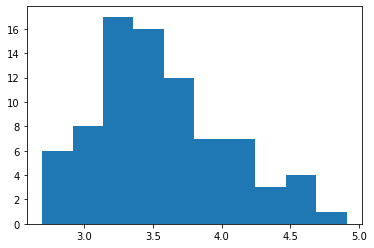

In [31]:
plt.hist([x for x in avgpe if x < 5.09 and x > 2.09])

In [32]:
pd.DataFrame(avgcap,columns=["avgcap"]).quantile(0.75)[0]+1.5*(pd.DataFrame(avgcap,columns=["avgcap"]).quantile(0.75)[0] - pd.DataFrame(avgcap,columns=["avgcap"]).quantile(0.25)[0])

25.92111907735477

In [33]:
pd.DataFrame(avgcap,columns=["avgcap"]).quantile(0.25)[0]-1.5*(pd.DataFrame(avgcap,columns=["avgcap"]).quantile(0.75)[0] - pd.DataFrame(avgcap,columns=["avgcap"]).quantile(0.25)[0])

19.792654637492543

(array([ 2.,  6., 14., 21., 13., 11., 10.,  5.,  1.,  1.]),
 array([20.25334054, 20.87456397, 21.4957874 , 22.11701082, 22.73823425,
        23.35945767, 23.9806811 , 24.60190452, 25.22312795, 25.84435137,
        26.4655748 ]),
 <a list of 10 Patch objects>)

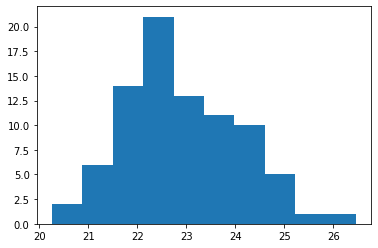

In [34]:
plt.hist([x for x in avgcap if x < 26.5 and x > 19.65])